In [1]:
import inspect
import warnings

warnings.filterwarnings("ignore")

import umap
from pmlb import fetch_data  # , classification_dataset_names
from scipy.stats import entropy, mannwhitneyu
from seaborn import scatterplot
from sklearn.model_selection import train_test_split

from gower.gower_dist import *

pd.options.display.float_format = '{:.6f}'.format

plt.style.use("dark_background")

optimize = optimize_genie

### This is a battery of tests to see how well various clustering evaluation metrics perform on a variety of datasets.

The datasets are all from the Penn Machine Learning Benchmark.

Each dataset is capped at 1,000 rows (stratified `train_test_split` with `random_state=42`).

The target variable is either binary or categorical.

### Dataset Selection:

All datasets were run through the `optimize_agglo` function with the default parameters.

If the maximum possible Gini-weighted average of Adjusted Mutual Information and Adjusted Rand Index across the grid of distance threshold values were greater than 0.4, the dataset was included in the analysis.

  0%|          | 0/50 [00:00<?, ?it/s]

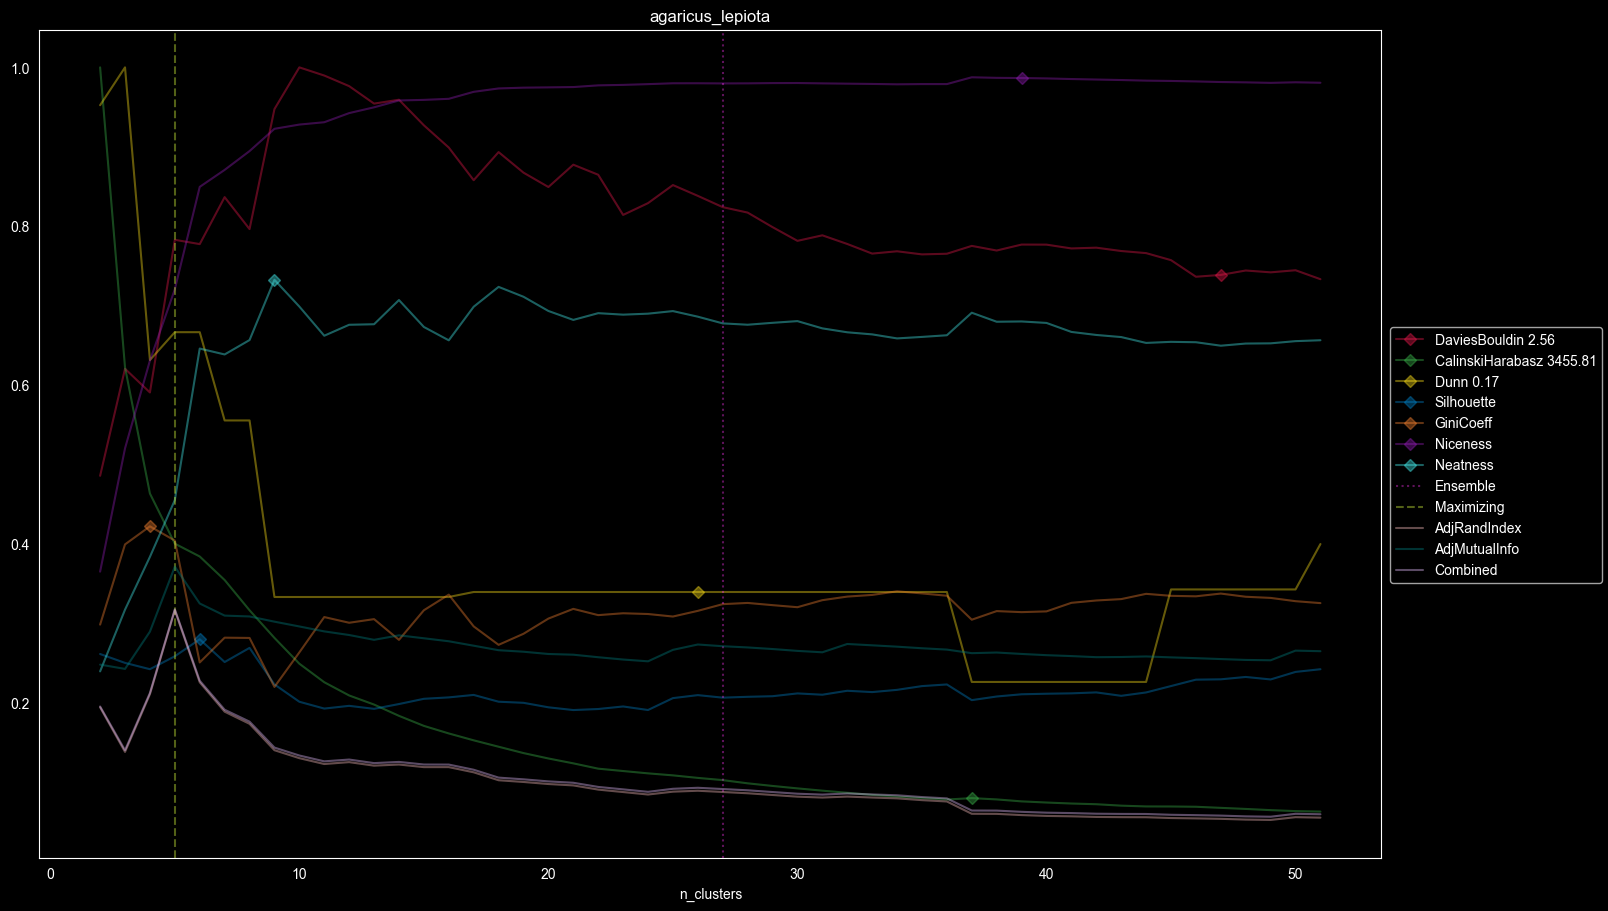

{'Silhouette': 0.25873081000060233, 'Niceness': 0.7206677639438794, 'GiniCoeff': 0.4043721674220208, 'Neatness': 0.45528457678015277, 'sample': {'n_clusters': 5}, 'counts_dict': {86: 1, 90: 1, 109: 1, 220: 1, 495: 1}, 'DaviesBouldin': 2.0070577458188907, 'CalinskiHarabasz': 1383.9305382123978, 'Dunn': 0.1111111111111111, 'AdjRandIndex': 0.31672986967045264, 'AdjMutualInfo': 0.3714926322465255, 'Combined': 0.317839432441922}
0    519
1    481
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     22.000000
k      2.000000
e      0.692425
g      0.020261
Name: agaricus_lepiota, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

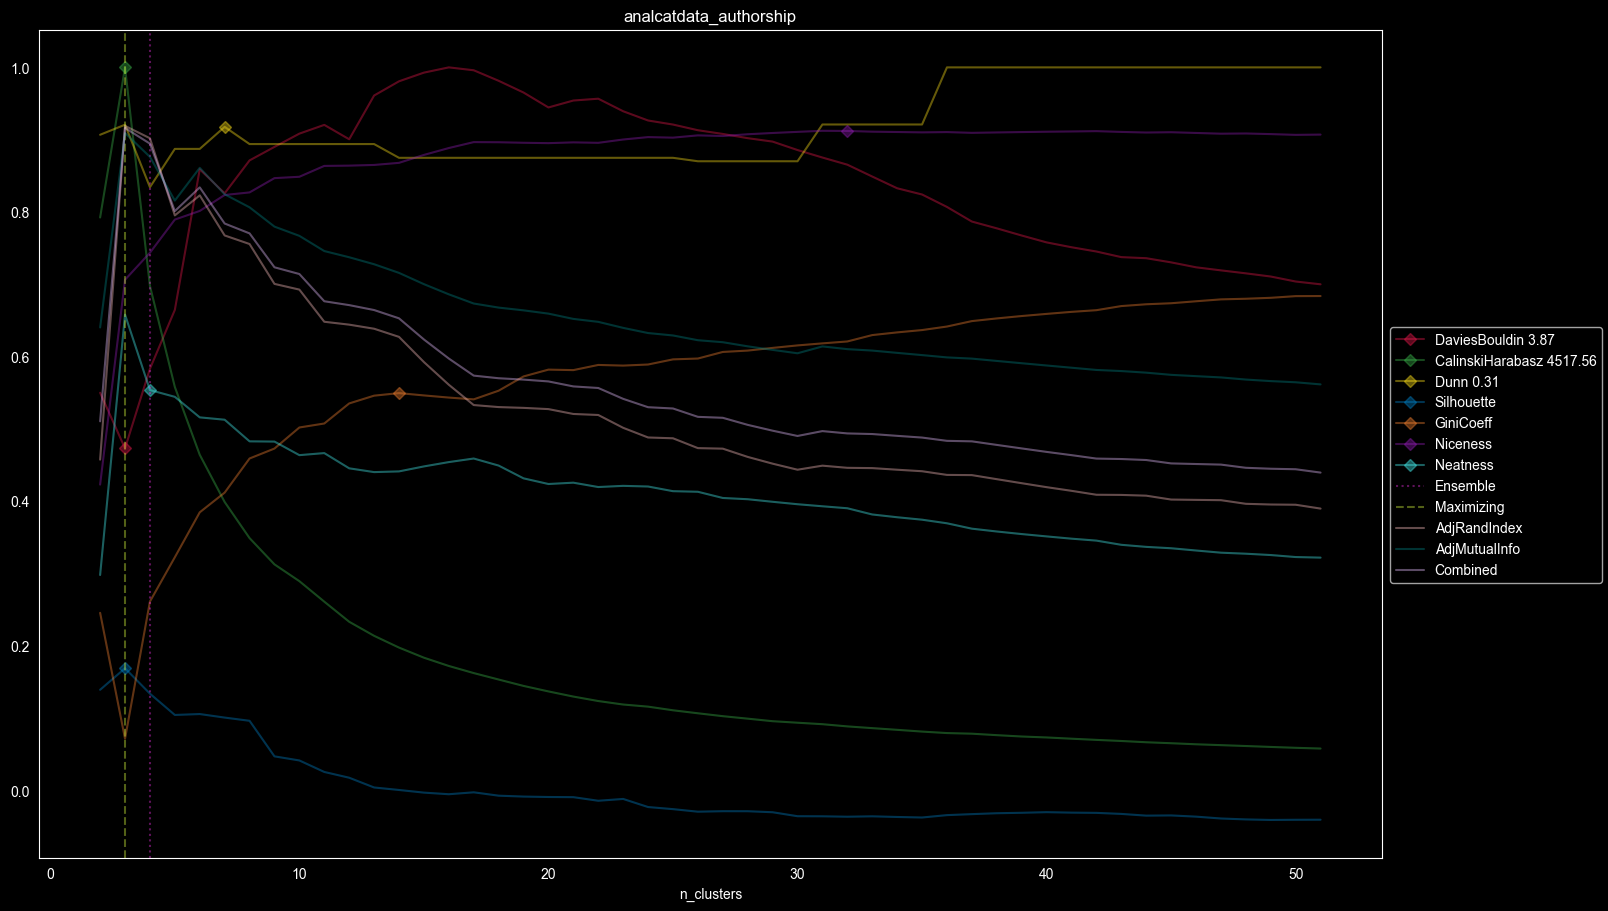

{'Silhouette': 0.16886558860502437, 'Niceness': 0.7062851415837408, 'GiniCoeff': 0.07142857142857142, 'Neatness': 0.6580685939593421, 'sample': {'n_clusters': 3}, 'counts_dict': {228: 1, 301: 1, 312: 1}, 'DaviesBouldin': 1.8307703972410545, 'CalinskiHarabasz': 4517.560591701779, 'Dunn': 0.28900949796472186, 'AdjRandIndex': 0.9190638512713368, 'AdjMutualInfo': 0.9092682207890004, 'Combined': 0.9162244928183891}
0    317
1    296
3    173
2     55
Name: count, dtype: int64
Dataset Summary
n   841.000000
d    70.000000
k     4.000000
e     1.238942
g     0.289860
Name: analcatdata_authorship, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

{'Silhouette': 0.5175073617443211, 'Niceness': 0.46687487628464946, 'GiniCoeff': 0.19702823179791976, 'Neatness': 0.3520937877666425, 'sample': {'n_clusters': 2}, 'counts_dict': {222: 1, 477: 1}, 'DaviesBouldin': 4.456541507624763, 'CalinskiHarabasz': 139.5880083422445, 'Dunn': 7.503956648741965e-07, 'AdjRandIndex': 0.6864997159009594, 'AdjMutualInfo': 0.5586712976225562, 'Combined': 0.665067087790209}
0    458
1    241
Name: count, dtype: int64
Dataset Summary
n   699.000000
d    10.000000
k     2.000000
e     0.644154
g     0.167667
Name: breast, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

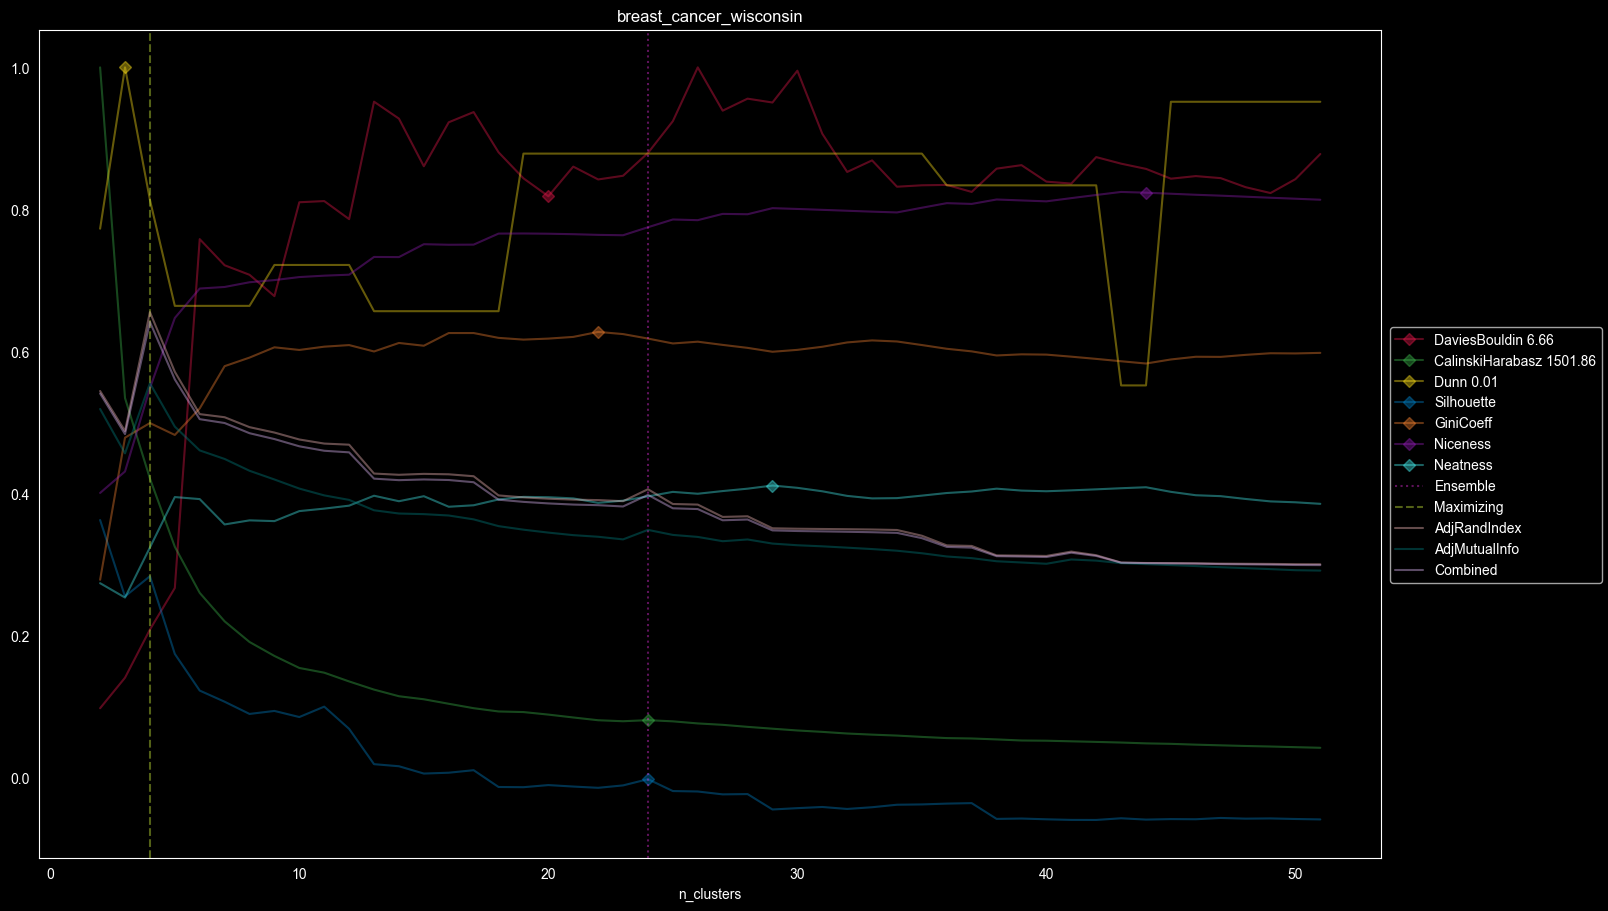

{'Silhouette': 0.283571581901618, 'Niceness': 0.5483369493486412, 'GiniCoeff': 0.4992421220582369, 'Neatness': 0.3240502844149983, 'sample': {'n_clusters': 4}, 'counts_dict': {46: 1, 55: 1, 84: 1, 384: 1}, 'DaviesBouldin': 1.3875049858899247, 'CalinskiHarabasz': 632.61582159318, 'Dunn': 0.004648337474805234, 'AdjRandIndex': 0.6554294940372768, 'AdjMutualInfo': 0.5553194459166633, 'Combined': 0.6415330852833983}
0    357
1    212
Name: count, dtype: int64
Dataset Summary
n   569.000000
d    30.000000
k     2.000000
e     0.660316
g     0.138811
Name: breast_cancer_wisconsin, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

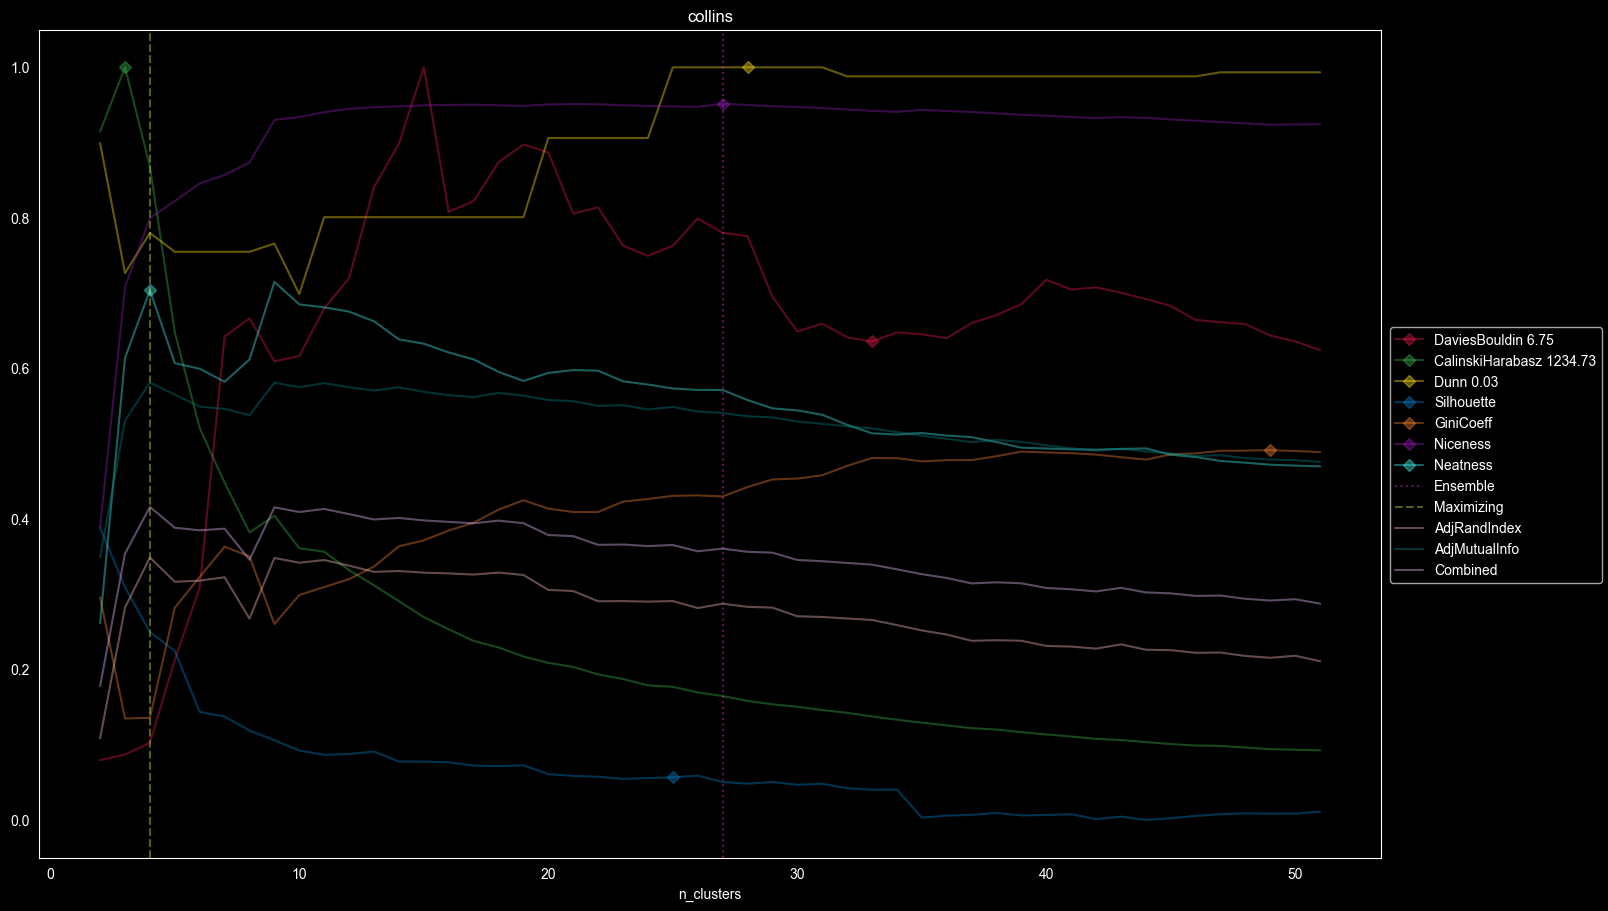

{'Silhouette': 0.2492890480337724, 'Niceness': 0.7995759762018462, 'GiniCoeff': 0.1351948986938188, 'Neatness': 0.7036432123218107, 'sample': {'n_clusters': 4}, 'counts_dict': {94: 1, 107: 1, 112: 1, 172: 1}, 'DaviesBouldin': 0.6877371049475672, 'CalinskiHarabasz': 1071.772805814228, 'Dunn': 0.025910658702784563, 'AdjRandIndex': 0.34839135309880703, 'AdjMutualInfo': 0.5809514059197094, 'Combined': 0.41558407716323276}
8     80
6     75
5     48
0     44
4     36
7     30
9     29
12    29
13    29
1     27
10    24
2     17
3     17
Name: count, dtype: int64
Dataset Summary
n   485.000000
d    23.000000
k    13.000000
e     2.447482
g     0.288926
Name: collins, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

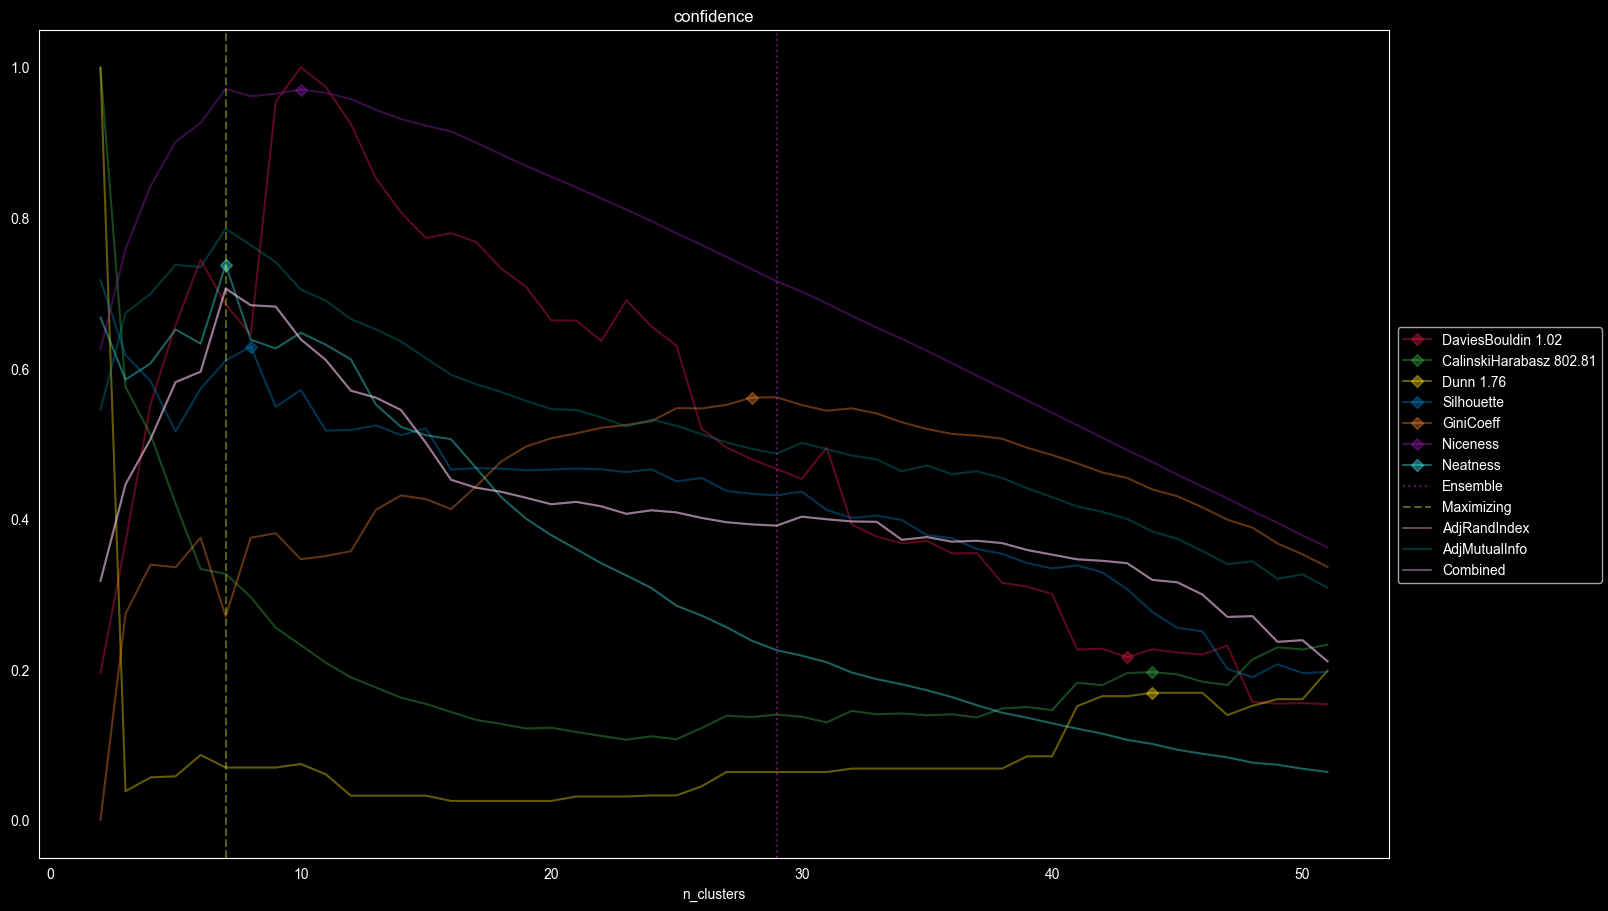

{'Silhouette': 0.610318052943524, 'Niceness': 0.9712921626984127, 'GiniCoeff': 0.27040816326530615, 'Neatness': 0.7379022884707599, 'sample': {'n_clusters': 7}, 'counts_dict': {5: 1, 7: 2, 11: 1, 12: 1, 13: 1, 17: 1}, 'DaviesBouldin': 0.6989139278660221, 'CalinskiHarabasz': 262.54660348975875, 'Dunn': 0.12294332723948813, 'AdjRandIndex': 0.705919836869942, 'AdjMutualInfo': 0.7854977985333296, 'Combined': 0.705919836869942}
0    12
4    12
2    12
1    12
5    12
3    12
Name: count, dtype: int64
Dataset Summary
n   72.000000
d    3.000000
k    6.000000
e    1.791759
g    0.000000
Name: confidence, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

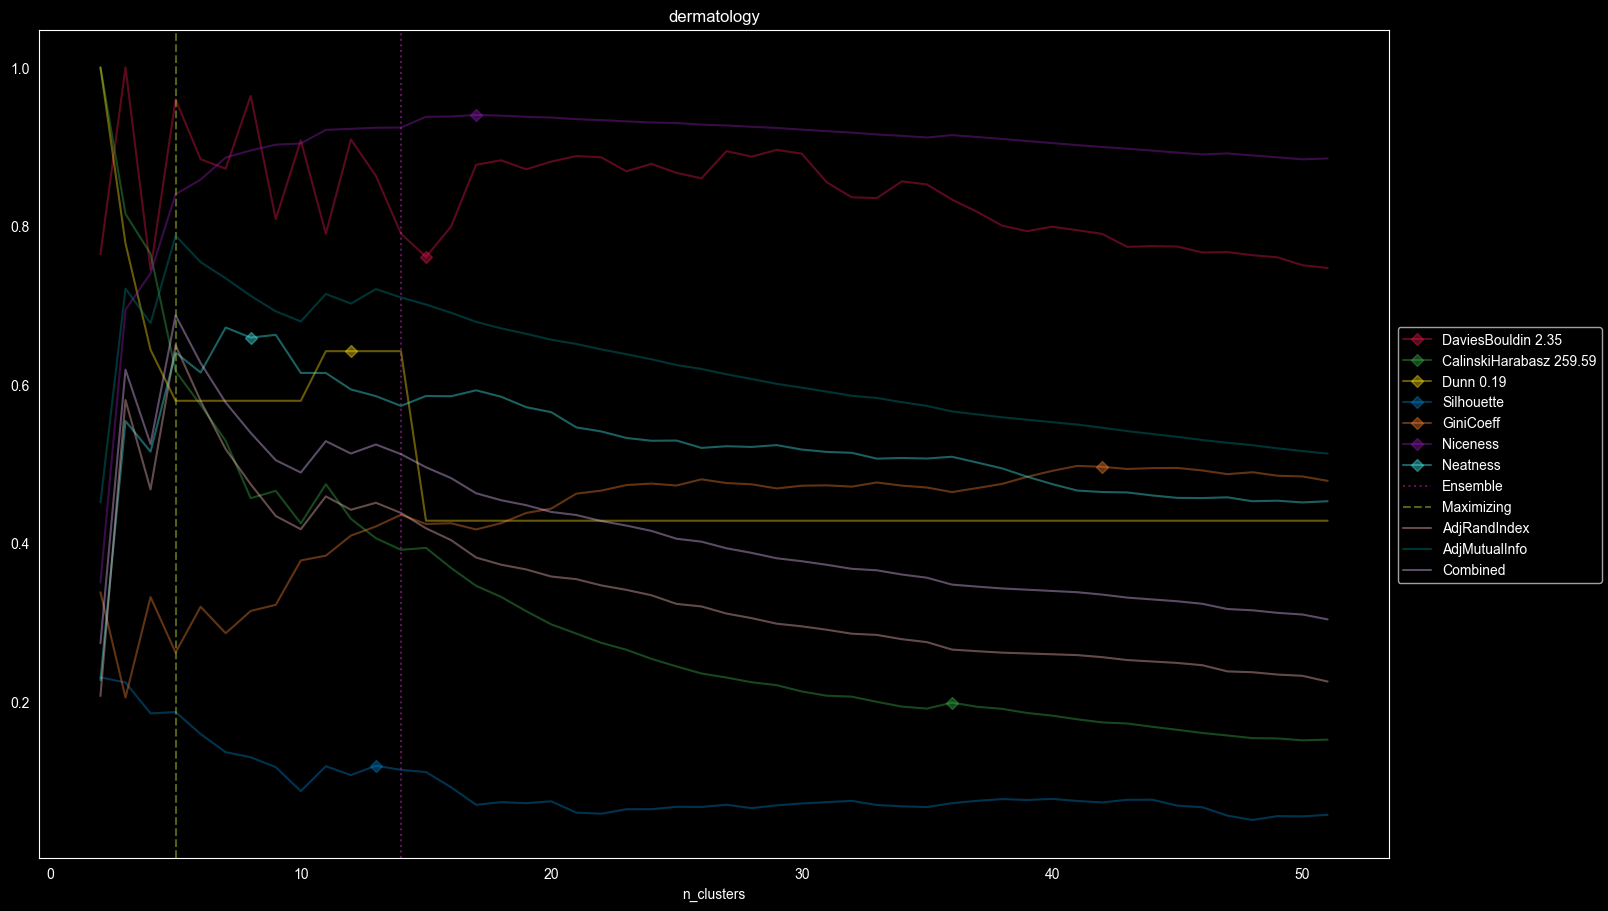

{'Silhouette': 0.1865314109031315, 'Niceness': 0.8399204959582827, 'GiniCoeff': 0.2616074287544028, 'Neatness': 0.6402318050128035, 'sample': {'n_clusters': 5}, 'counts_dict': {33: 1, 51: 1, 72: 1, 88: 1, 122: 1}, 'DaviesBouldin': 2.2534966913443806, 'CalinskiHarabasz': 160.07593623688203, 'Dunn': 0.10975609756097561, 'AdjRandIndex': 0.6494169337634004, 'AdjMutualInfo': 0.7876175450908889, 'Combined': 0.6871127030287859}
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64
Dataset Summary
n   366.000000
d    34.000000
k     6.000000
e     1.686148
g     0.272761
Name: dermatology, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

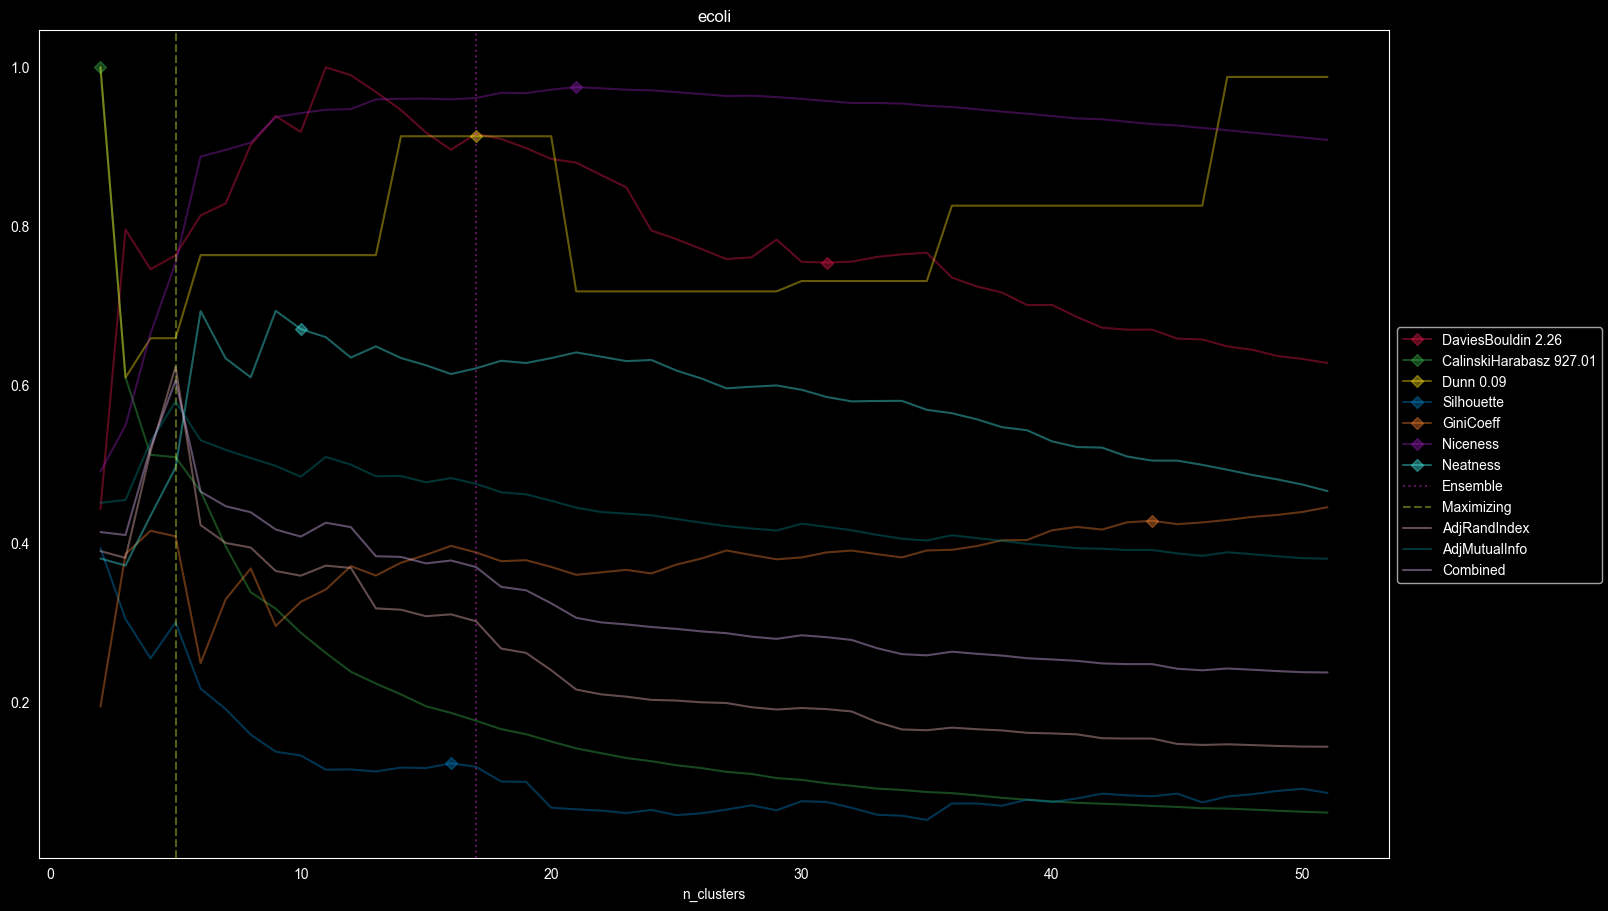

{'Silhouette': 0.30002114231104354, 'Niceness': 0.7532226742698866, 'GiniCoeff': 0.40845231296402057, 'Neatness': 0.4953333463544684, 'sample': {'n_clusters': 5}, 'counts_dict': {27: 1, 30: 1, 51: 1, 56: 1, 163: 1}, 'DaviesBouldin': 1.7242879345741986, 'CalinskiHarabasz': 471.2216873732411, 'Dunn': 0.06008583690987125, 'AdjRandIndex': 0.6222377411996277, 'AdjMutualInfo': 0.5784256022706337, 'Combined': 0.6049430807611806}
0    143
1     77
7     52
4     35
5     20
Name: count, dtype: int64
Dataset Summary
n   327.000000
d     7.000000
k     5.000000
e     1.404712
g     0.394746
Name: ecoli, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

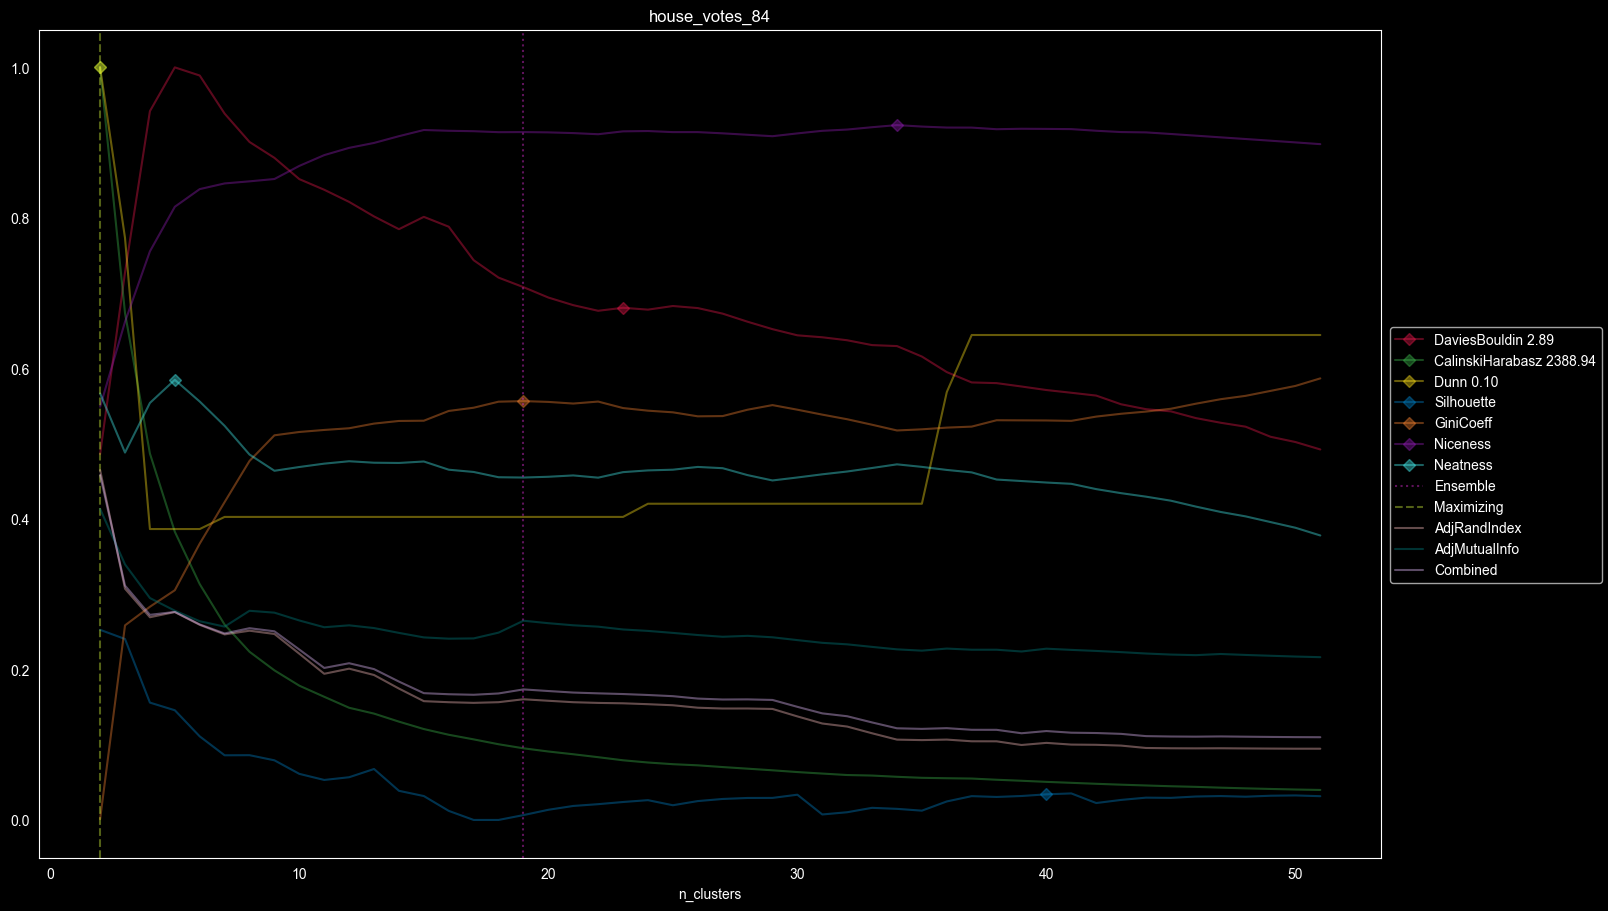

{'Silhouette': 0.2527752792576815, 'Niceness': 0.5491043594603934, 'GiniCoeff': 0.0012681159420289854, 'Neatness': 0.5668507536115813, 'sample': {'n_clusters': 2}, 'counts_dict': {217: 1, 218: 1}, 'DaviesBouldin': 1.404674139555726, 'CalinskiHarabasz': 2388.938106173693, 'Dunn': 0.10344827586206896, 'AdjRandIndex': 0.4649903030469501, 'AdjMutualInfo': 0.4134068568068083, 'Combined': 0.4585143377852801}
0    267
1    168
Name: count, dtype: int64
Dataset Summary
n   435.000000
d    16.000000
k     2.000000
e     0.667021
g     0.125543
Name: house_votes_84, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

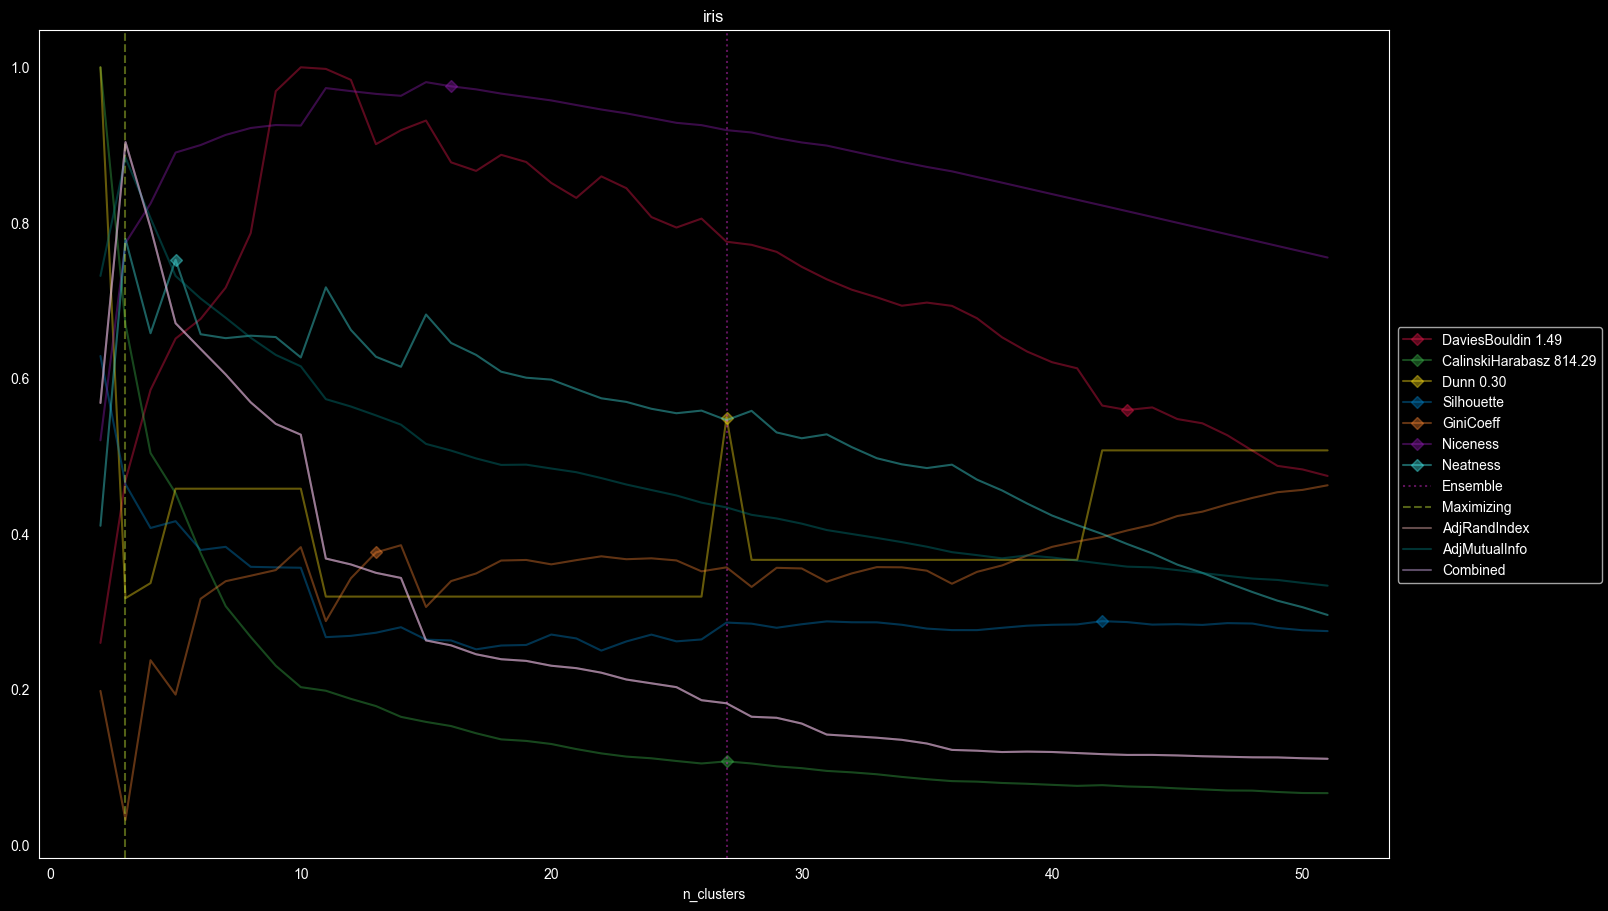

{'Silhouette': 0.46351186731507976, 'Niceness': 0.77388647834942, 'GiniCoeff': 0.03162055335968379, 'Neatness': 0.7791916779325675, 'sample': {'n_clusters': 3}, 'counts_dict': {47: 1, 50: 1, 53: 1}, 'DaviesBouldin': 0.7000525354128716, 'CalinskiHarabasz': 544.9288280716286, 'Dunn': 0.09615384615384606, 'AdjRandIndex': 0.9037675791580496, 'AdjMutualInfo': 0.8836227970842698, 'Combined': 0.9037675791580496}
2    50
1    50
0    50
Name: count, dtype: int64
Dataset Summary
n   150.000000
d     4.000000
k     3.000000
e     1.098612
g     0.000000
Name: iris, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

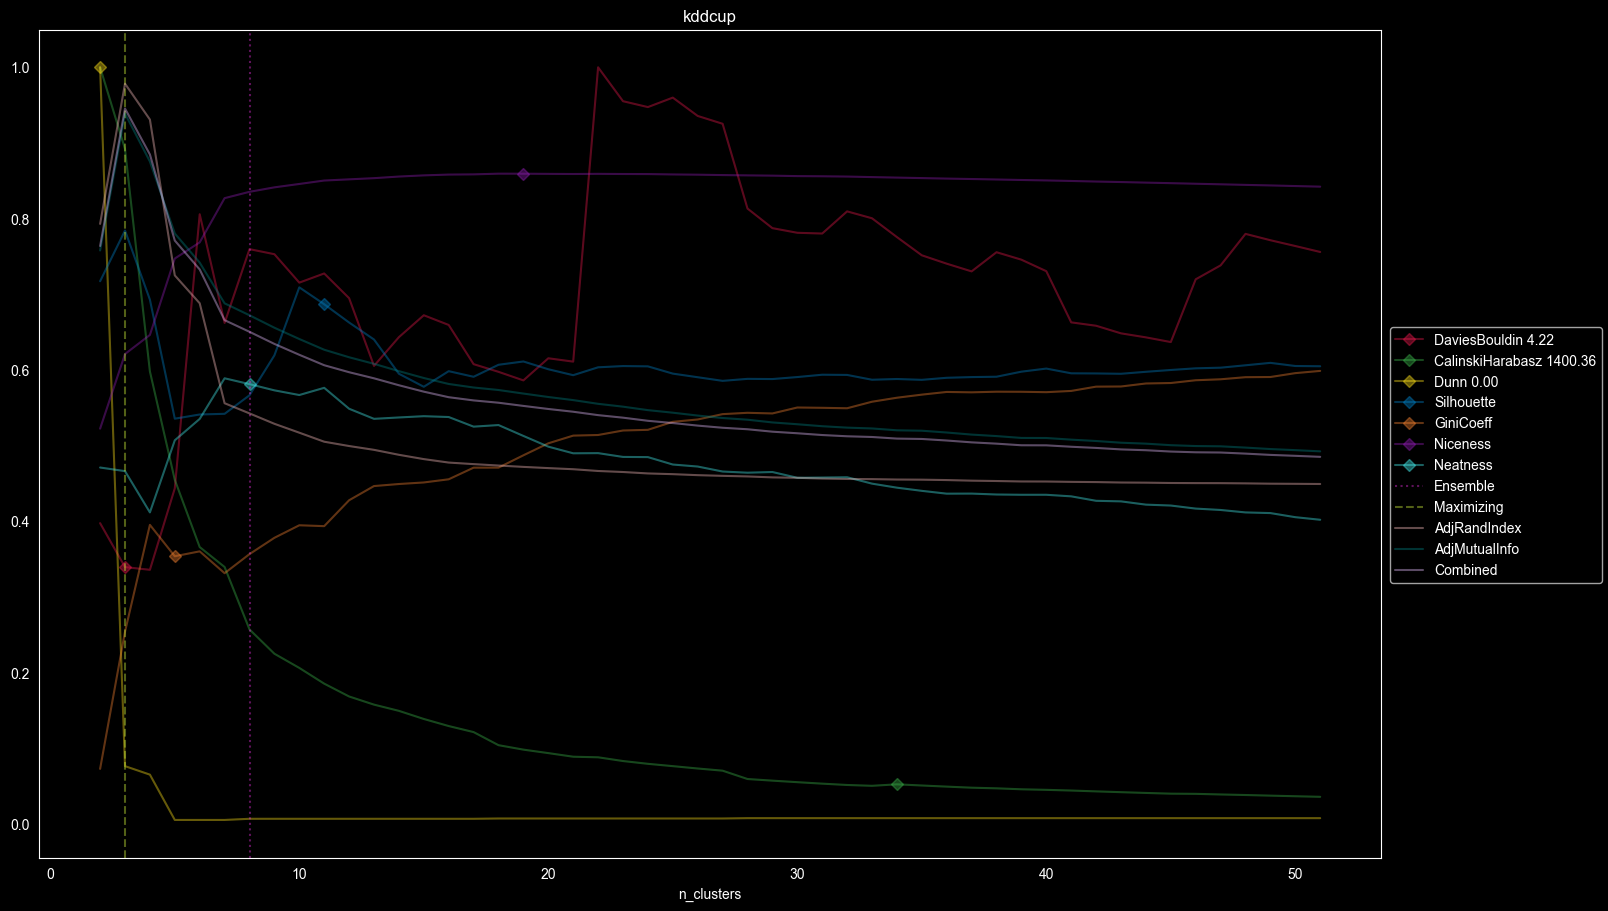

{'Silhouette': 0.7842362678153404, 'Niceness': 0.6209176905251363, 'GiniCoeff': 0.25379898693681685, 'Neatness': 0.4661476034774276, 'sample': {'n_clusters': 3}, 'counts_dict': {211: 1, 221: 1, 568: 1}, 'DaviesBouldin': 1.4328229416312699, 'CalinskiHarabasz': 1249.2425012907759, 'Dunn': 0.00010069824493193987, 'AdjRandIndex': 0.9783694741702273, 'AdjMutualInfo': 0.9388050418547993, 'Combined': 0.9454683132287338}
18    568
9     217
11    197
0       4
5       3
17      3
20      2
21      2
15      2
14      1
10      1
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     41.000000
k     11.000000
e      1.080906
g      0.831584
Name: kddcup, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

{'Silhouette': 0.18479165988854435, 'Niceness': 0.938757969934726, 'GiniCoeff': 0.2516662223407091, 'Neatness': 0.7191232043608171, 'sample': {'n_clusters': 11}, 'counts_dict': {41: 1, 56: 1, 58: 1, 67: 1, 72: 1, 81: 1, 88: 1, 107: 1, 114: 1, 117: 1, 199: 1}, 'DaviesBouldin': 1.808294993247265, 'CalinskiHarabasz': 7755.04990319324, 'Dunn': 0.11717796403287493, 'AdjRandIndex': 0.6485990760601039, 'AdjMutualInfo': 0.773521290379454, 'Combined': 0.6485990760601039}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d    216.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_factors, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

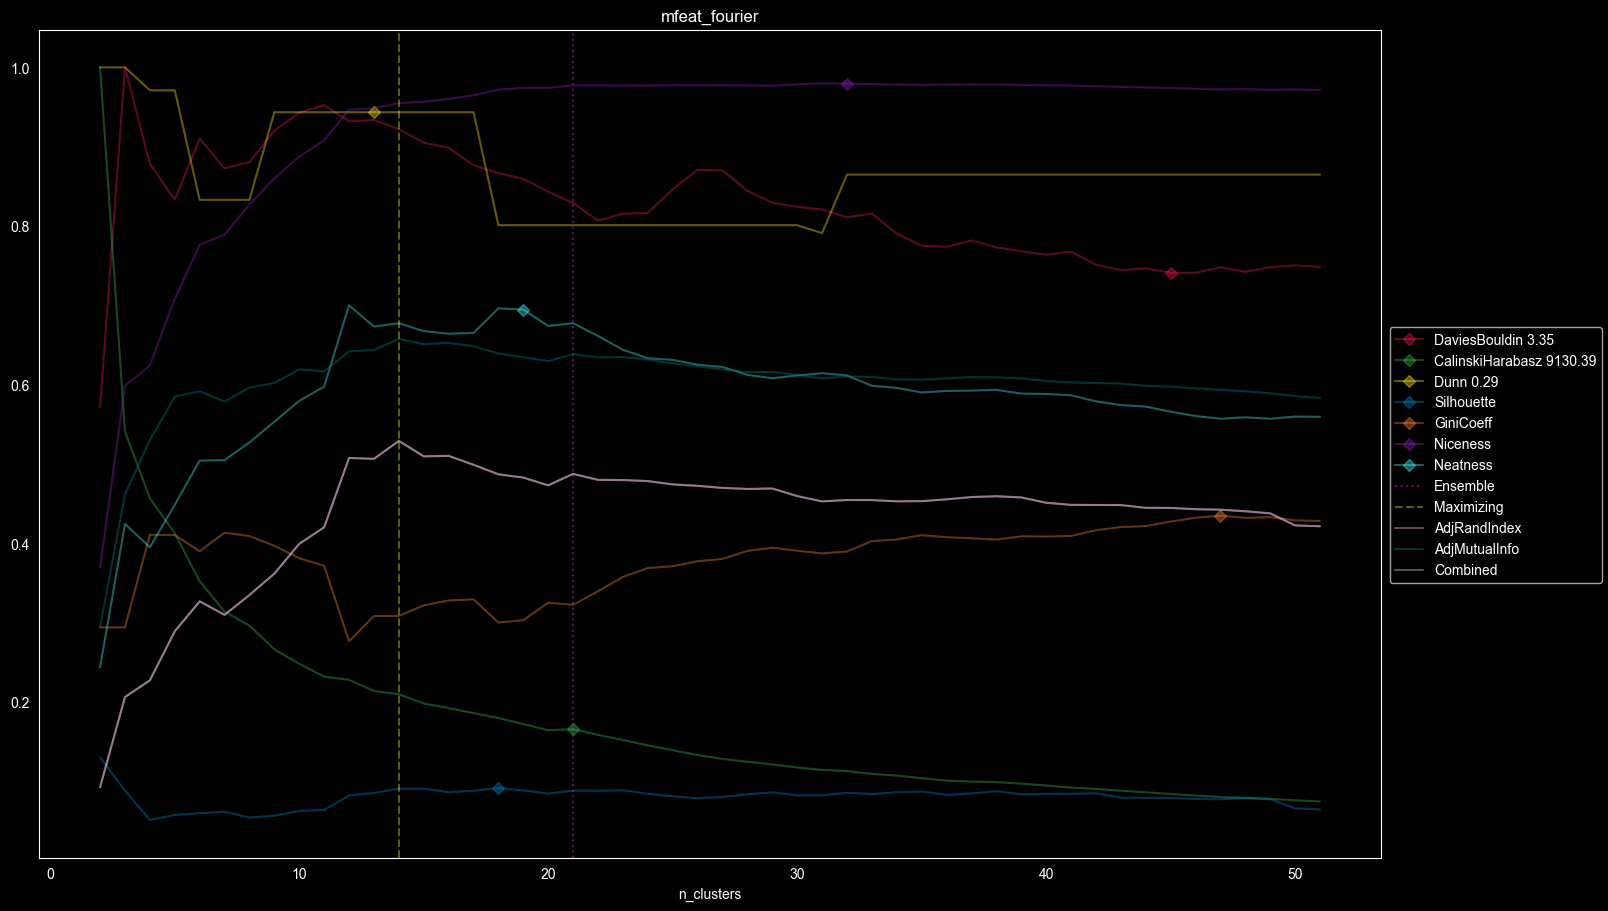

{'Silhouette': 0.09121584126643185, 'Niceness': 0.9548345397803327, 'GiniCoeff': 0.30879384545073696, 'Neatness': 0.6776179106877984, 'sample': {'n_clusters': 14}, 'counts_dict': {33: 2, 37: 1, 40: 1, 43: 1, 45: 1, 46: 1, 48: 1, 77: 1, 100: 1, 106: 1, 124: 1, 133: 1, 135: 1}, 'DaviesBouldin': 3.09361413625765, 'CalinskiHarabasz': 1918.5996204501394, 'Dunn': 0.27769720523871233, 'AdjRandIndex': 0.5293709061770523, 'AdjMutualInfo': 0.6579402152559571, 'Combined': 0.5293709061770523}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     76.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_fourier, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

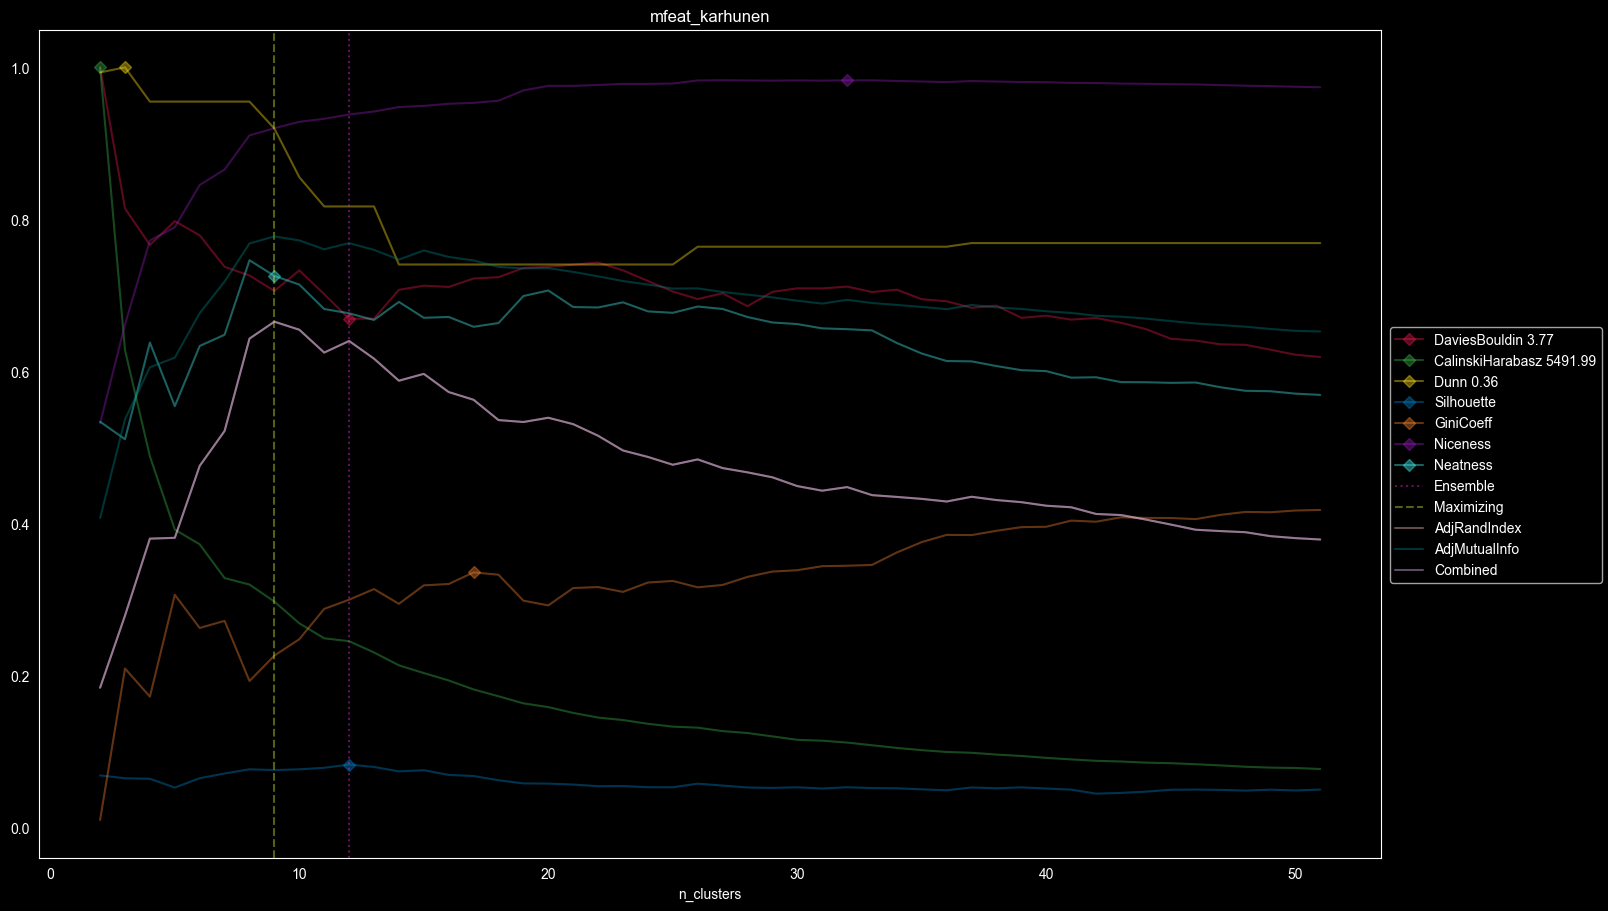

{'Silhouette': 0.07626349656015072, 'Niceness': 0.9200193457449855, 'GiniCoeff': 0.22678396871945258, 'Neatness': 0.7258543148860815, 'sample': {'n_clusters': 9}, 'counts_dict': {43: 1, 67: 1, 97: 1, 101: 1, 103: 1, 114: 1, 128: 1, 133: 1, 214: 1}, 'DaviesBouldin': 2.65943830596676, 'CalinskiHarabasz': 1635.088071583177, 'Dunn': 0.3317187776484495, 'AdjRandIndex': 0.6656813520298674, 'AdjMutualInfo': 0.7778141197593146, 'Combined': 0.6656813520298674}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     64.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_karhunen, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

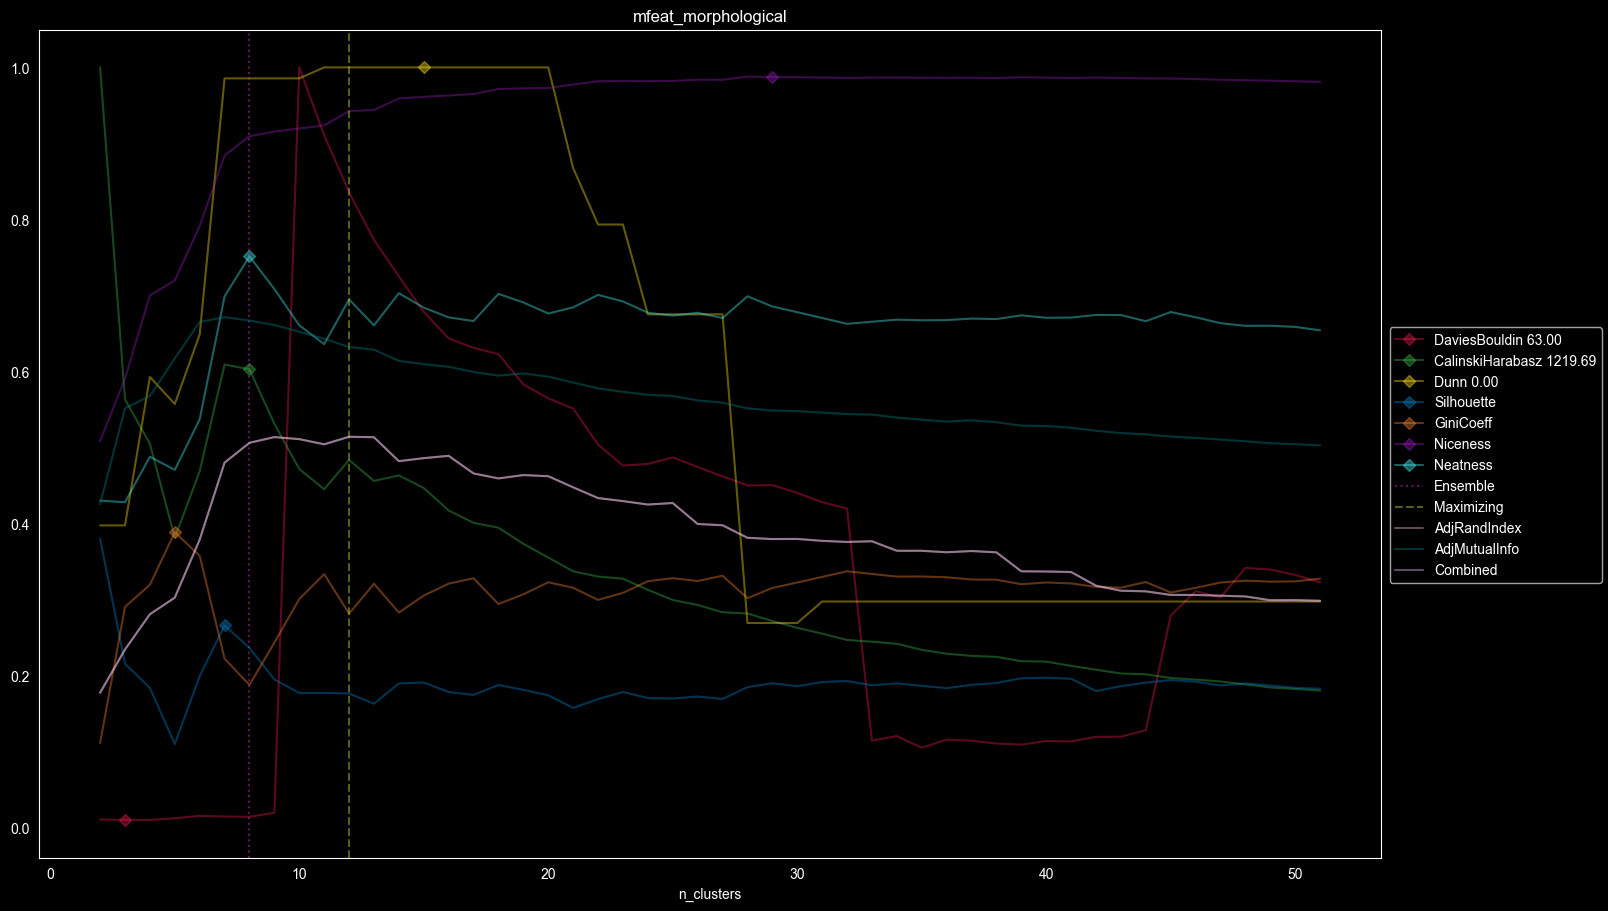

{'Silhouette': 0.17693436466968054, 'Niceness': 0.9424888274861211, 'GiniCoeff': 0.2820581178352439, 'Neatness': 0.6949711704865293, 'sample': {'n_clusters': 12}, 'counts_dict': {34: 1, 37: 1, 42: 1, 63: 1, 69: 1, 78: 1, 81: 2, 95: 1, 101: 1, 120: 1, 199: 1}, 'DaviesBouldin': 52.65878388390335, 'CalinskiHarabasz': 590.3122217583942, 'Dunn': 0.0006176187359530382, 'AdjRandIndex': 0.5144618537193666, 'AdjMutualInfo': 0.6324621664707448, 'Combined': 0.5144618537193666}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d      6.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_morphological, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

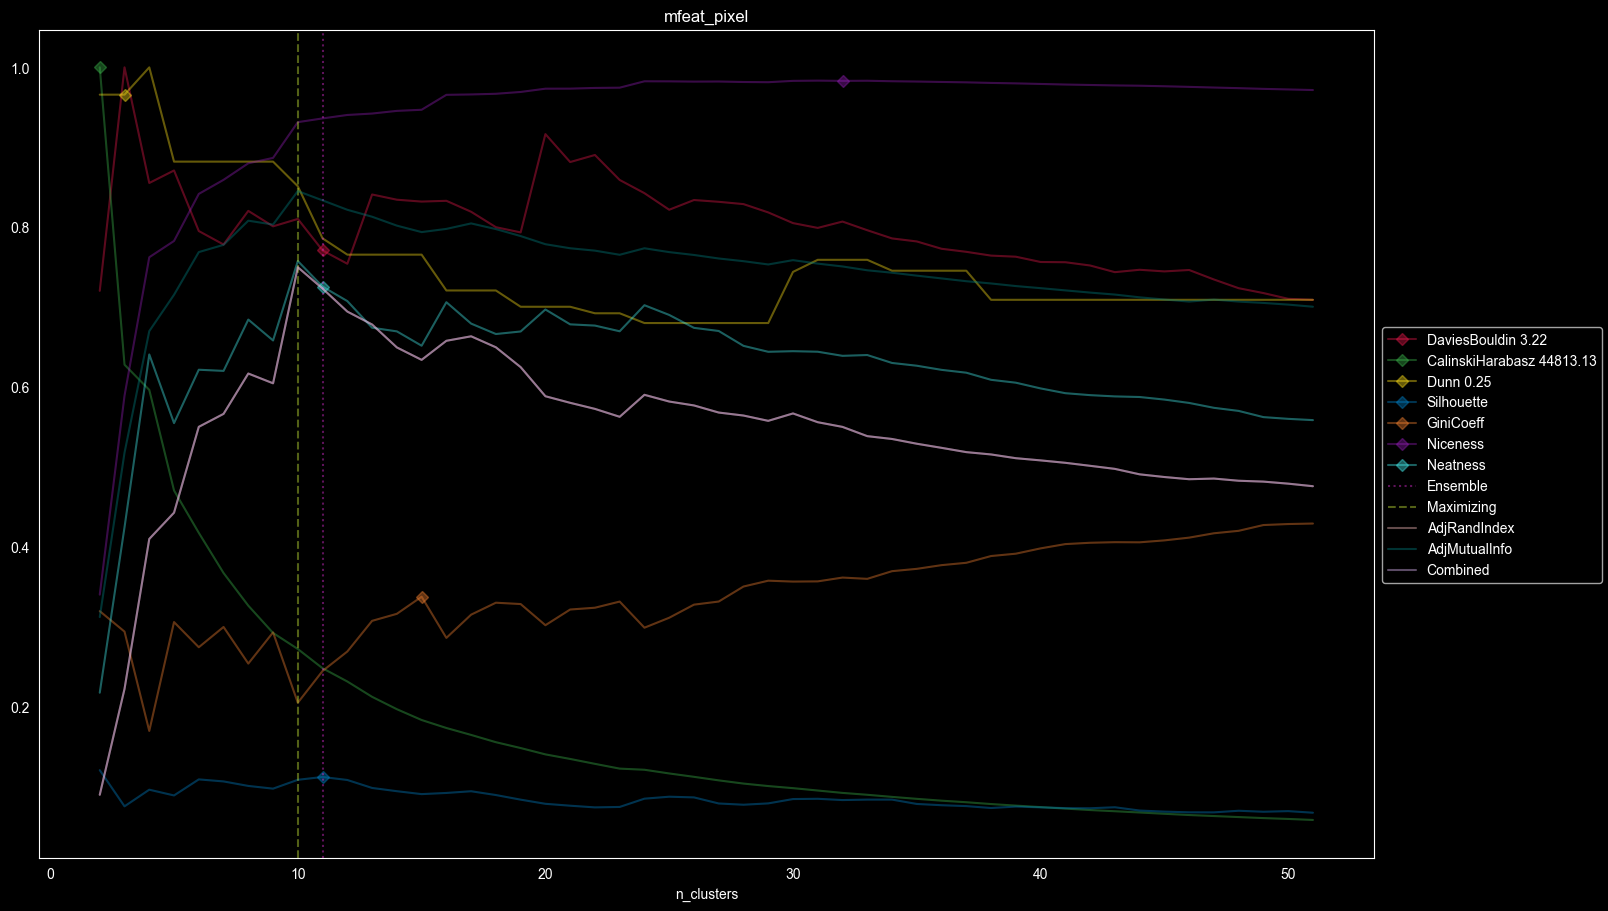

{'Silhouette': 0.10896967184360815, 'Niceness': 0.9314915170383694, 'GiniCoeff': 0.20538523060517194, 'Neatness': 0.757800895246275, 'sample': {'n_clusters': 10}, 'counts_dict': {53: 1, 68: 1, 72: 1, 89: 1, 94: 1, 99: 1, 100: 1, 103: 1, 106: 1, 216: 1}, 'DaviesBouldin': 2.6087047470642175, 'CalinskiHarabasz': 12213.909828530797, 'Dunn': 0.21132457027300303, 'AdjRandIndex': 0.7500091235906859, 'AdjMutualInfo': 0.8452584176775373, 'Combined': 0.7500091235906859}
9    100
6    100
4    100
2    100
5    100
7    100
3    100
1    100
0    100
8    100
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d    240.000000
k     10.000000
e      2.302585
g      0.000000
Name: mfeat_pixel, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

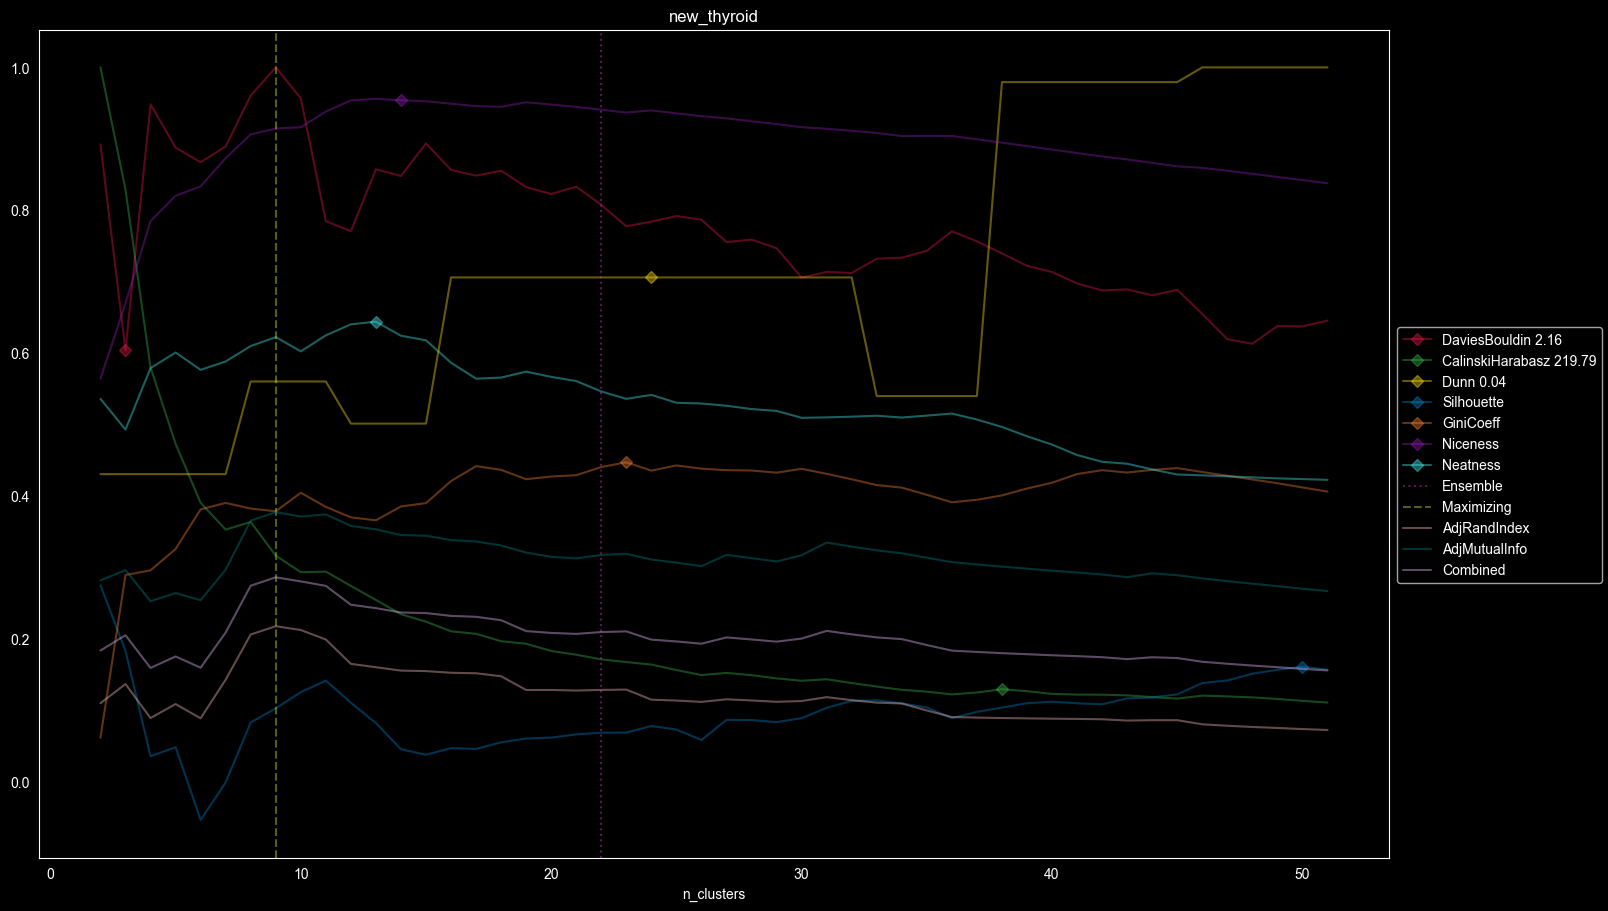

{'Silhouette': 0.1026911667086492, 'Niceness': 0.9144413537320353, 'GiniCoeff': 0.37857142857142856, 'Neatness': 0.6224182683011376, 'sample': {'n_clusters': 9}, 'counts_dict': {11: 3, 16: 1, 22: 1, 23: 1, 24: 1, 26: 1, 71: 1}, 'DaviesBouldin': 2.1596708630325034, 'CalinskiHarabasz': 69.57765653232744, 'Dunn': 0.02193995381062356, 'AdjRandIndex': 0.21768225021993956, 'AdjMutualInfo': 0.3774139151852413, 'Combined': 0.2861386780622117}
1    150
2     35
3     30
Name: count, dtype: int64
Dataset Summary
n   215.000000
d     5.000000
k     3.000000
e     0.821483
g     0.428571
Name: new_thyroid, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

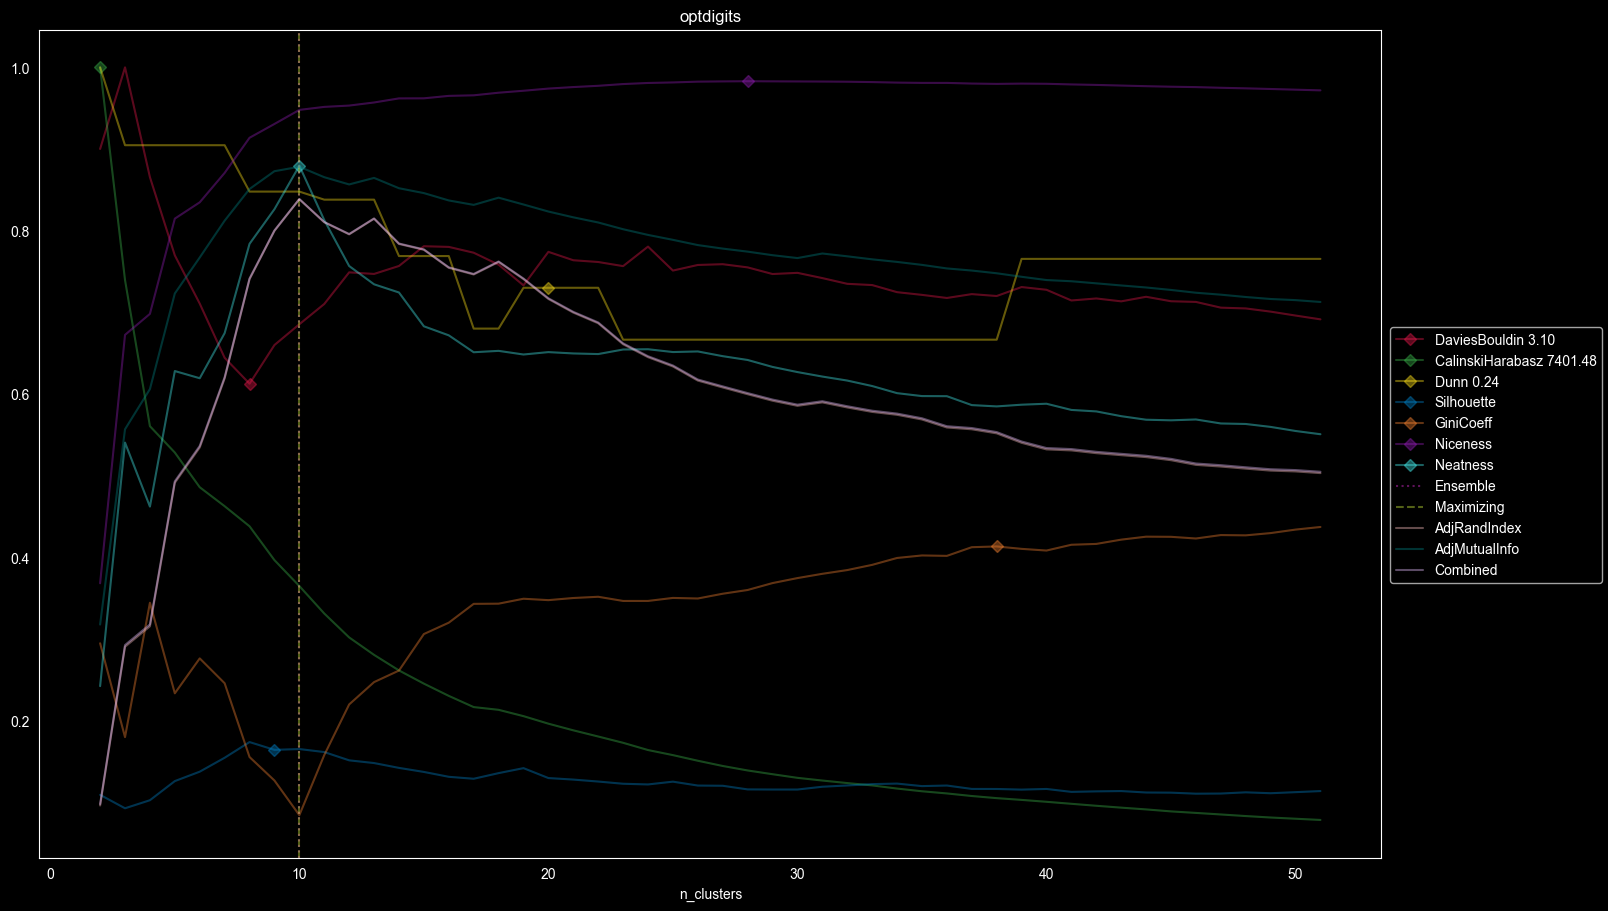

{'Silhouette': 0.16598692963876818, 'Niceness': 0.9479629387030104, 'GiniCoeff': 0.08509730738469741, 'Neatness': 0.8796407450867594, 'sample': {'n_clusters': 10}, 'counts_dict': {71: 1, 81: 1, 94: 1, 97: 1, 101: 1, 104: 1, 107: 1, 108: 1, 116: 1, 121: 1}, 'DaviesBouldin': 2.1289305058697314, 'CalinskiHarabasz': 2704.550387391881, 'Dunn': 0.2028301886792453, 'AdjRandIndex': 0.8386499046961636, 'AdjMutualInfo': 0.87841350279568, 'Combined': 0.8389636883548535}
3    102
1    102
7    101
4    101
9    100
2     99
6     99
8     99
5     99
0     98
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     64.000000
k     10.000000
e      2.302495
g      0.007891
Name: optdigits, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

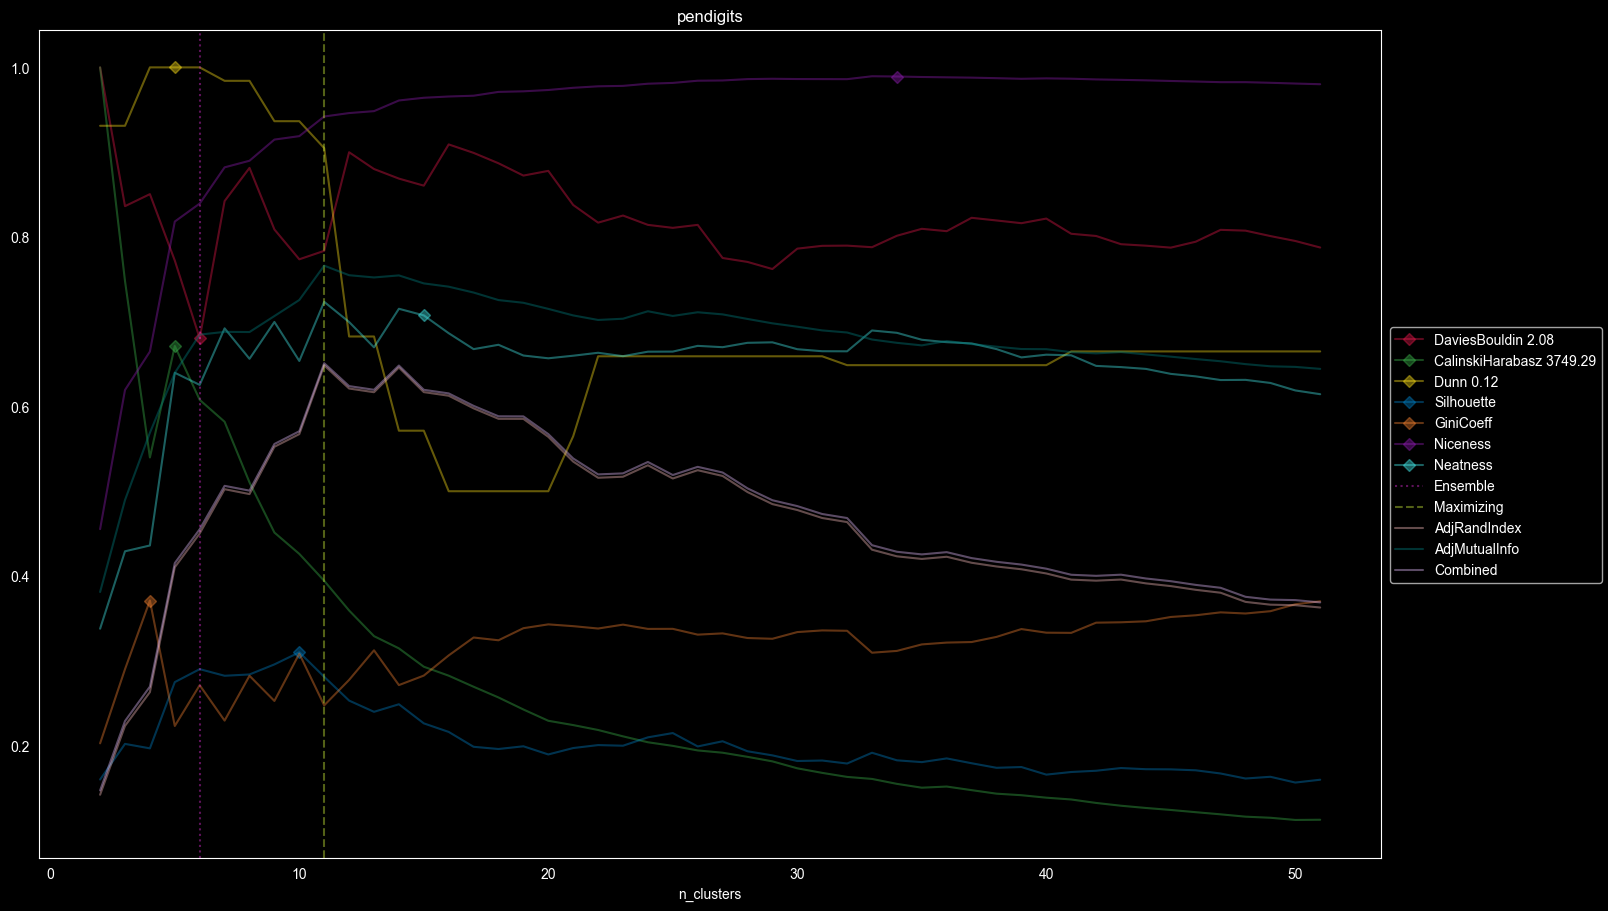

{'Silhouette': 0.2810876539875859, 'Niceness': 0.9420400675752733, 'GiniCoeff': 0.24740069314849372, 'Neatness': 0.7234290302068943, 'sample': {'n_clusters': 11}, 'counts_dict': {38: 1, 41: 1, 62: 1, 72: 1, 81: 1, 85: 1, 99: 1, 105: 1, 106: 1, 141: 1, 170: 1}, 'DaviesBouldin': 1.6260038321838501, 'CalinskiHarabasz': 1478.4772776412403, 'Dunn': 0.11100292112950341, 'AdjRandIndex': 0.6485093692255951, 'AdjMutualInfo': 0.7660980443037705, 'Combined': 0.6510172588566945}
2    104
4    104
1    104
0    104
7    104
3     96
8     96
6     96
5     96
9     96
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     16.000000
k     10.000000
e      2.301785
g      0.021328
Name: pendigits, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

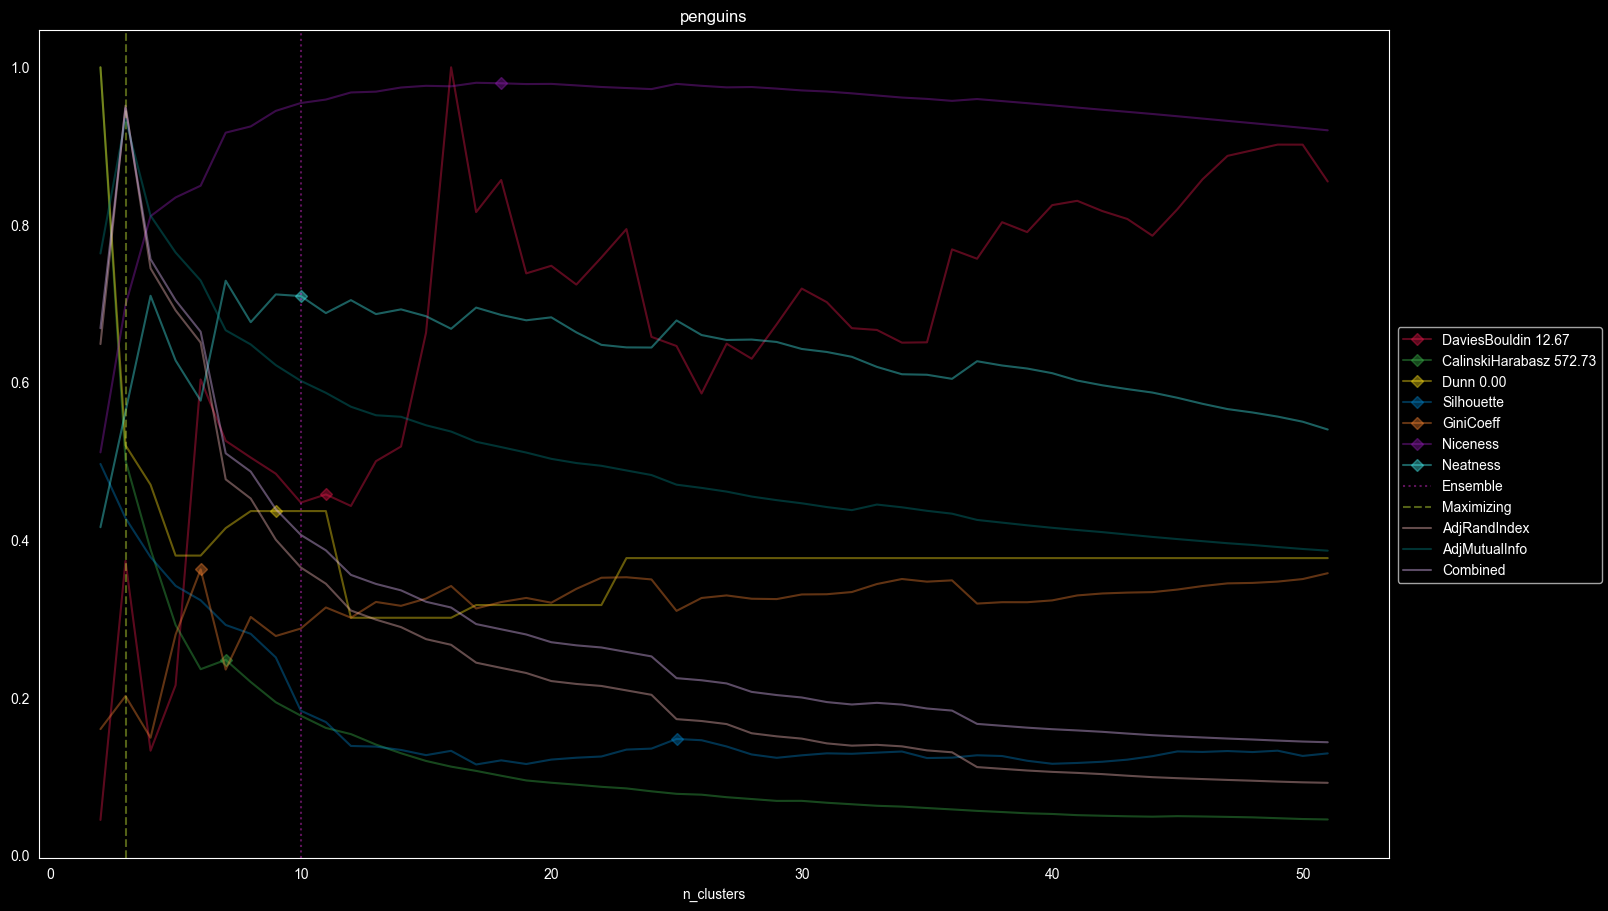

{'Silhouette': 0.42760656235063615, 'Niceness': 0.6980525681110075, 'GiniCoeff': 0.20168067226890757, 'Neatness': 0.5628256023859873, 'sample': {'n_clusters': 3}, 'counts_dict': {62: 1, 119: 1, 152: 1}, 'DaviesBouldin': 4.728694040675644, 'CalinskiHarabasz': 286.8565195985852, 'Dunn': 0.0021913190054782985, 'AdjRandIndex': 0.9512585706192984, 'AdjMutualInfo': 0.9342194798030019, 'Combined': 0.9482803093673743}
0    146
2    119
1     68
Name: count, dtype: int64
Dataset Summary
n   333.000000
d     7.000000
k     3.000000
e     1.053642
g     0.174790
Name: penguins, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

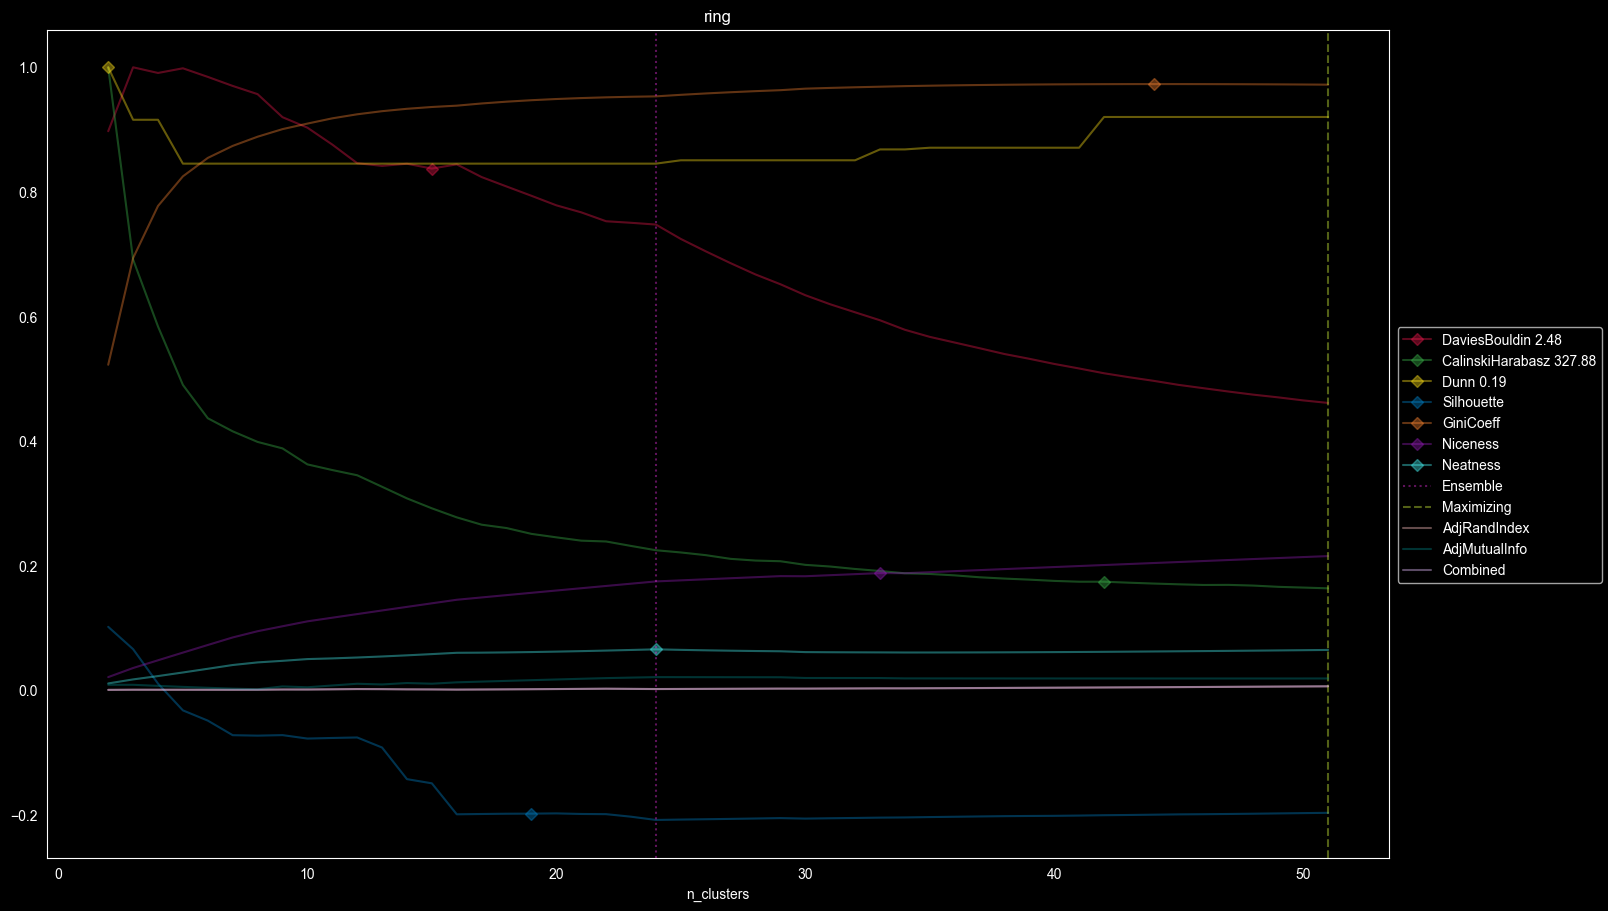

{'Silhouette': -0.19678622076625174, 'Niceness': 0.215340084985565, 'GiniCoeff': 0.9721224666886216, 'Neatness': 0.06468366592435533, 'sample': {'n_clusters': 51}, 'counts_dict': {1: 27, 2: 9, 3: 5, 4: 2, 5: 1, 6: 5, 10: 1, 887: 1}, 'DaviesBouldin': 1.1421784994591258, 'CalinskiHarabasz': 53.63981749400081, 'Dunn': 0.1783835209663702, 'AdjRandIndex': 0.006271633498134559, 'AdjMutualInfo': 0.018875893163569746, 'Combined': 0.00633883829507103}
1    505
0    495
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     20.000000
k      2.000000
e      0.693097
g      0.005332
Name: ring, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

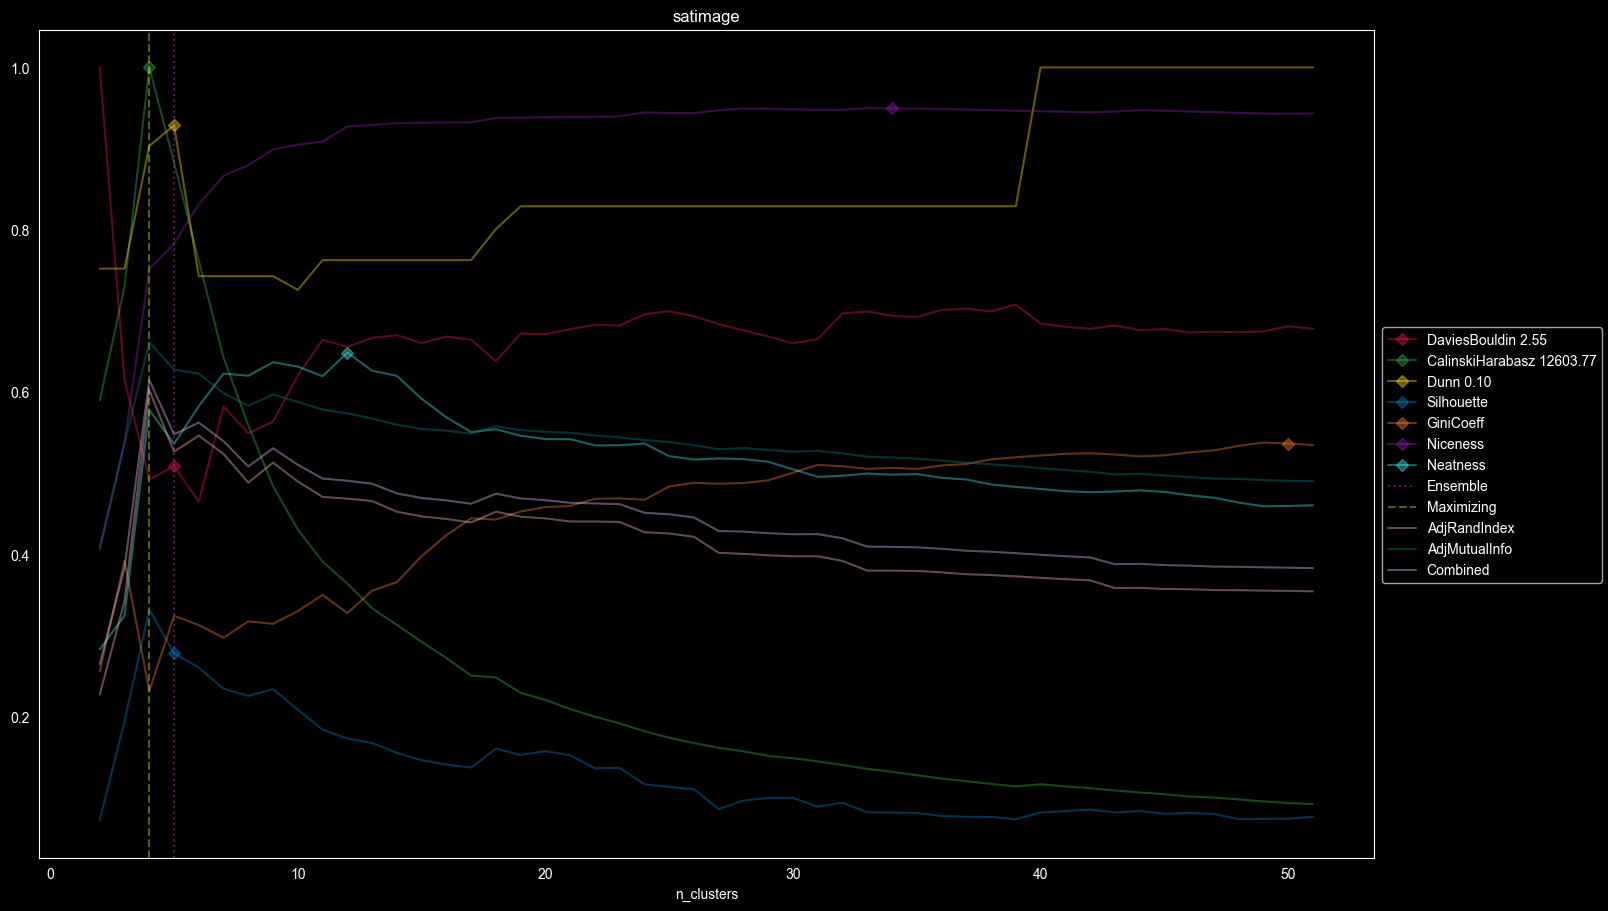

{'Silhouette': 0.3323306946007211, 'Niceness': 0.7516710655351092, 'GiniCoeff': 0.23193814982671287, 'Neatness': 0.5778598844056704, 'sample': {'n_clusters': 4}, 'counts_dict': {94: 1, 260: 1, 263: 1, 383: 1}, 'DaviesBouldin': 1.2578161903971938, 'CalinskiHarabasz': 12603.76725390826, 'Dunn': 0.08856682769726248, 'AdjRandIndex': 0.6026897956580373, 'AdjMutualInfo': 0.6613886976108947, 'Combined': 0.6150419683963619}
1    238
7    235
3    211
5    110
2    109
4     97
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     36.000000
k      6.000000
e      1.720953
g      0.210433
Name: satimage, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

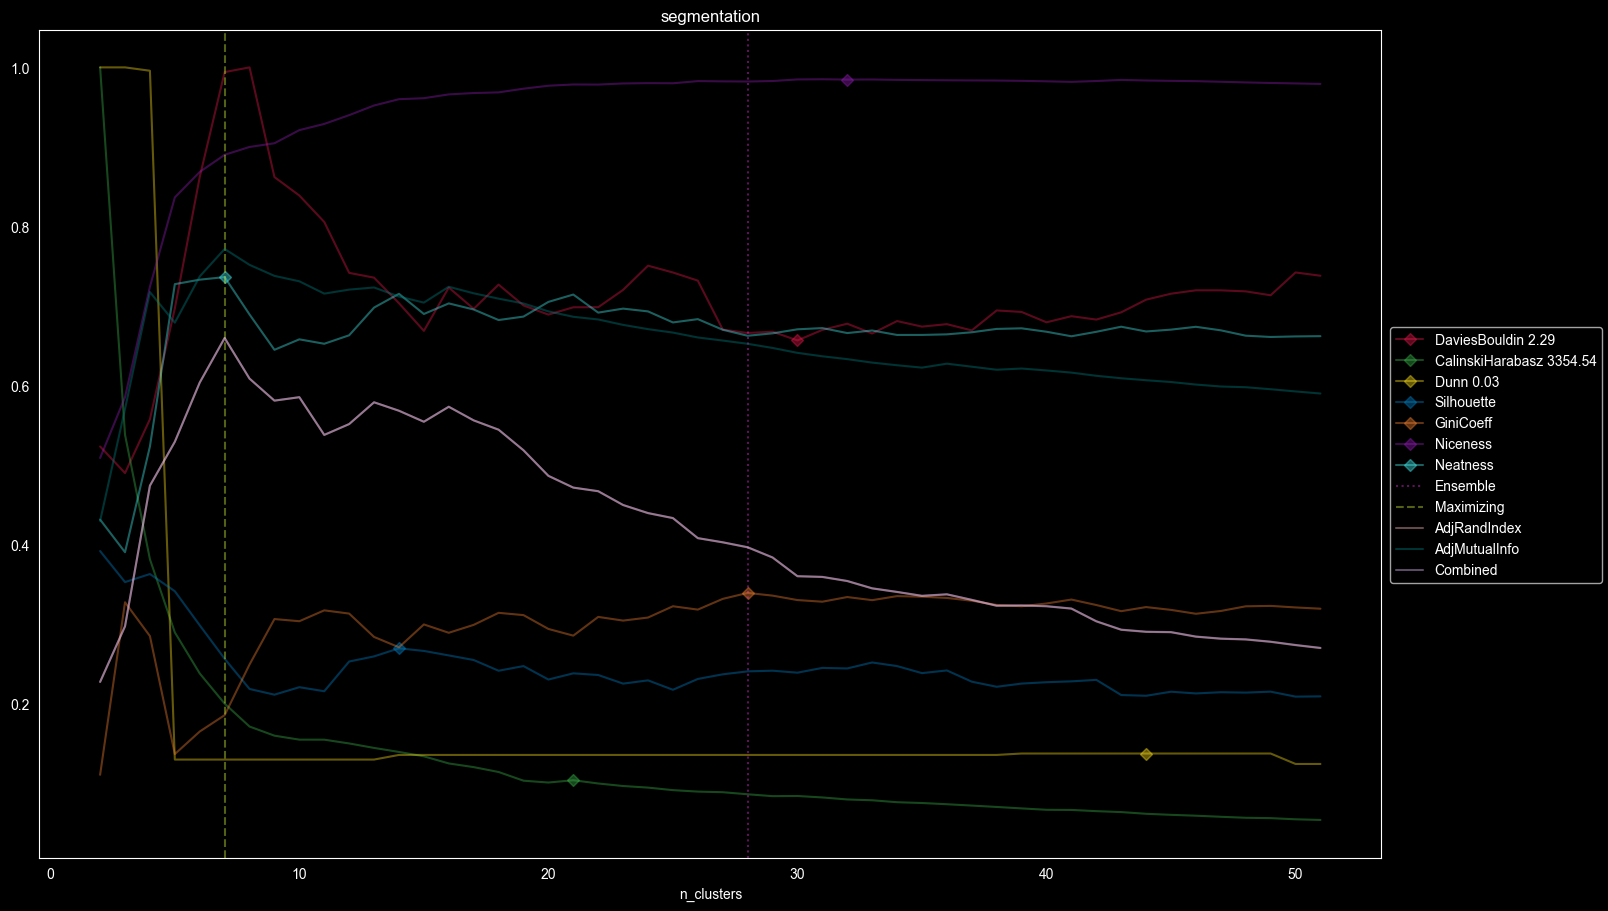

{'Silhouette': 0.2567526321202822, 'Niceness': 0.8900935448289079, 'GiniCoeff': 0.18585520051795712, 'Neatness': 0.7364089916488887, 'sample': {'n_clusters': 7}, 'counts_dict': {71: 1, 104: 1, 142: 1, 143: 1, 149: 2, 242: 1}, 'DaviesBouldin': 2.272043115226352, 'CalinskiHarabasz': 672.0992823536781, 'Dunn': 0.004067436878066396, 'AdjRandIndex': 0.6598252233498135, 'AdjMutualInfo': 0.7717756520229861, 'Combined': 0.6599275507401535}
6    143
2    143
4    143
3    143
5    143
1    143
0    142
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     19.000000
k      7.000000
e      1.945907
g      0.000914
Name: segmentation, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

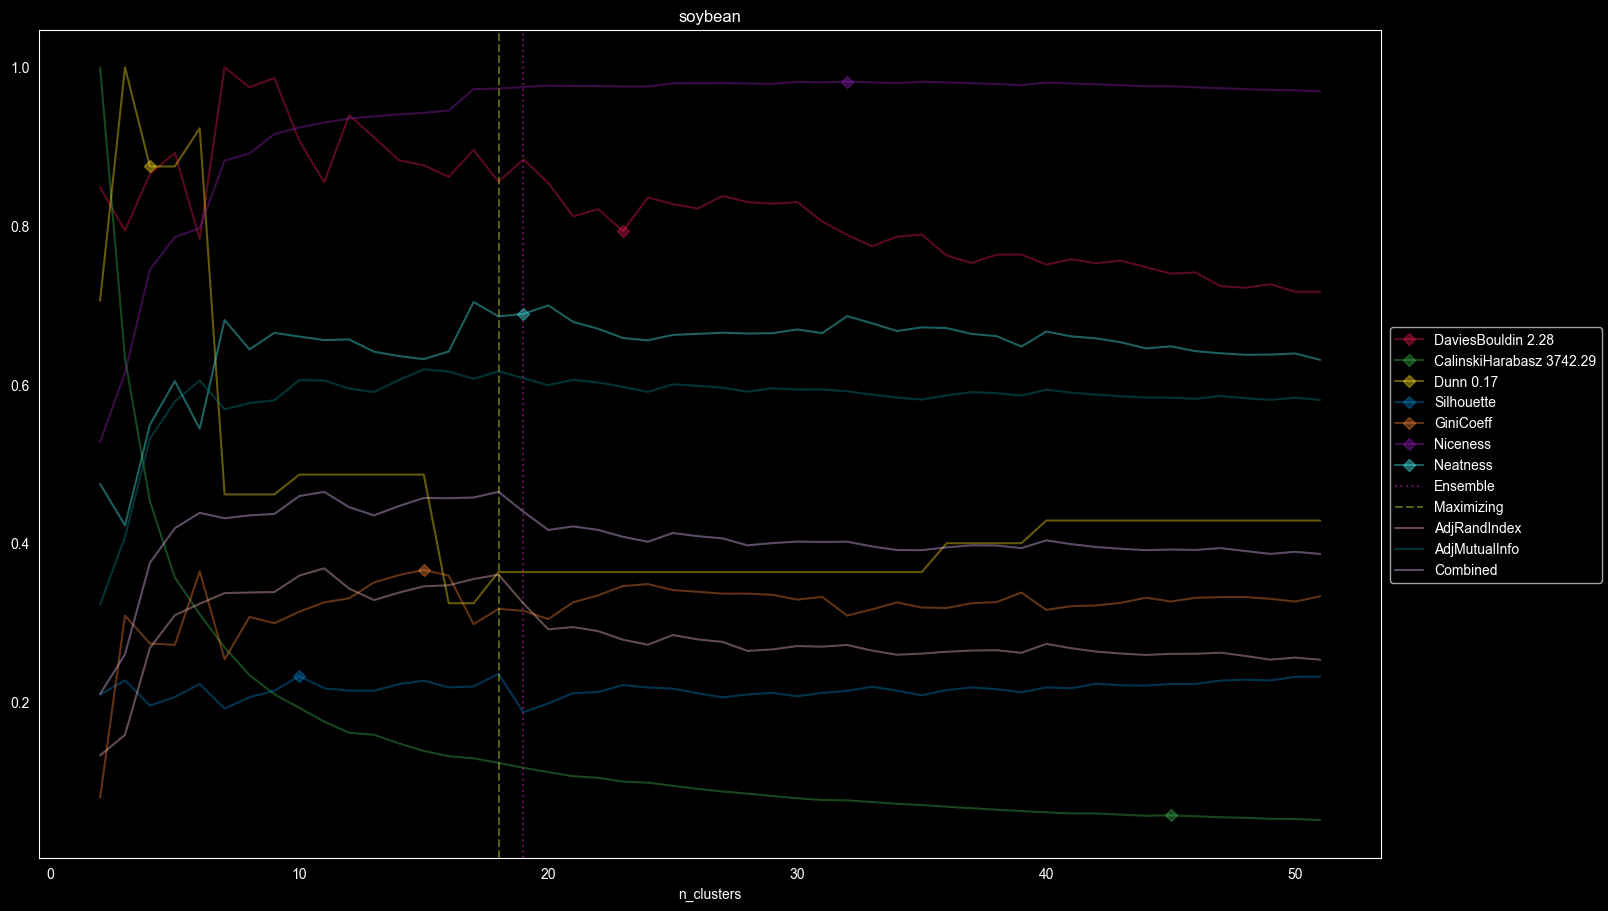

{'Silhouette': 0.23531859422130327, 'Niceness': 0.9730074361588721, 'GiniCoeff': 0.31719910974148263, 'Neatness': 0.6859845412275899, 'sample': {'n_clusters': 18}, 'counts_dict': {15: 1, 20: 3, 21: 1, 23: 1, 24: 1, 27: 1, 30: 1, 33: 1, 35: 1, 40: 1, 41: 1, 43: 1, 48: 1, 55: 1, 68: 1, 112: 1}, 'DaviesBouldin': 1.9490795536009644, 'CalinskiHarabasz': 460.45602596893406, 'Dunn': 0.06060606060606061, 'AdjRandIndex': 0.3604386032577869, 'AdjMutualInfo': 0.6167869360086998, 'Combined': 0.4648019111414302}
5     92
12    91
1     91
15    88
6     44
2     44
10    20
17    20
14    20
4     20
7     20
3     20
11    20
16    20
18    20
0     16
9     15
8     14
Name: count, dtype: int64
Dataset Summary
n   675.000000
d    35.000000
k    18.000000
e     2.625593
g     0.407115
Name: soybean, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

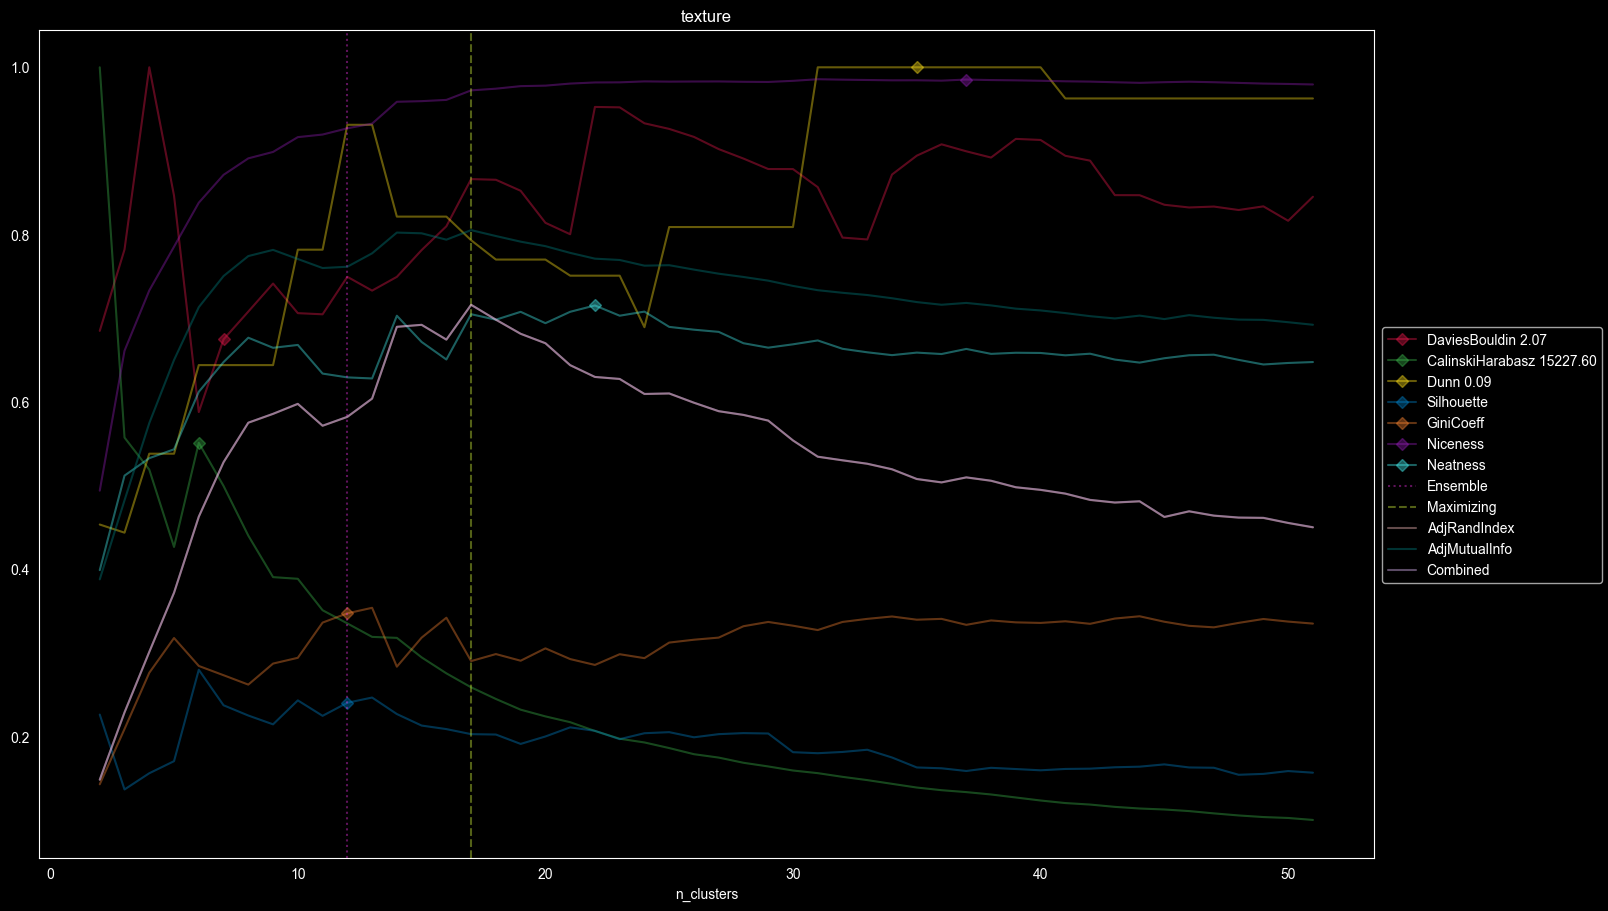

{'Silhouette': 0.20284788822636274, 'Niceness': 0.9724186593522511, 'GiniCoeff': 0.29018144181159533, 'Neatness': 0.7048360272358689, 'sample': {'n_clusters': 17}, 'counts_dict': {20: 1, 25: 1, 27: 1, 28: 1, 33: 1, 36: 1, 37: 1, 53: 1, 59: 1, 67: 1, 70: 1, 76: 1, 83: 1, 88: 1, 91: 1, 92: 1, 115: 1}, 'DaviesBouldin': 1.7919863596869976, 'CalinskiHarabasz': 3940.9322755091753, 'Dunn': 0.06948114003035585, 'AdjRandIndex': 0.7160433104024472, 'AdjMutualInfo': 0.8053552017005339, 'Combined': 0.7161298927841617}
7     91
6     91
2     91
3     91
9     91
14    91
13    91
4     91
10    91
12    91
8     90
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     40.000000
k     11.000000
e      2.397890
g      0.000969
Name: texture, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

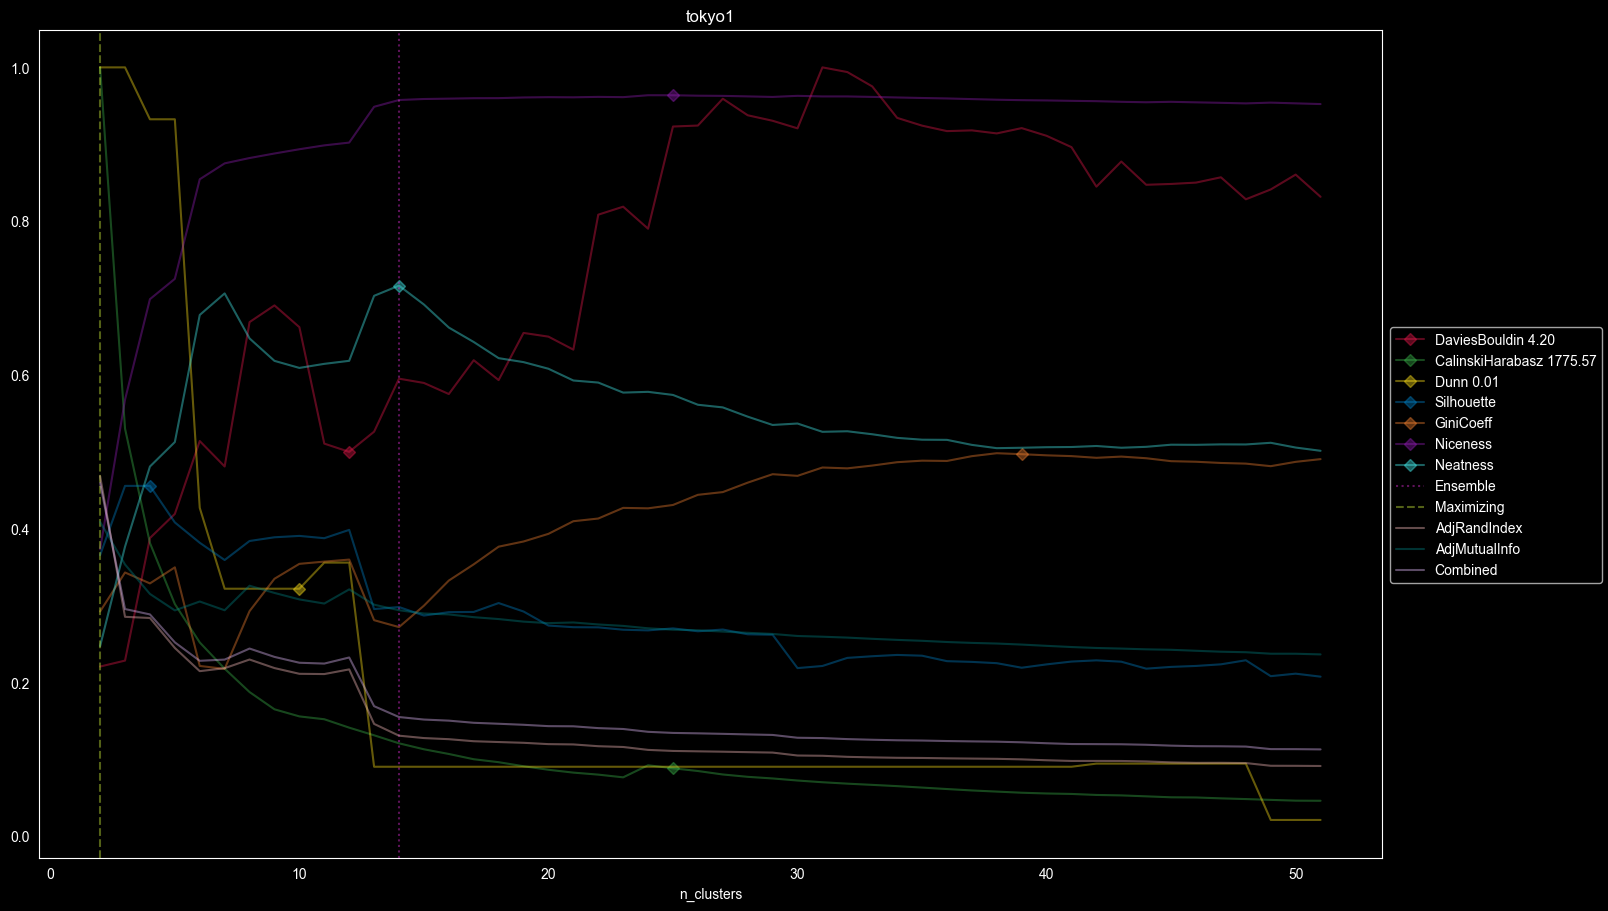

{'Silhouette': 0.3655824173784937, 'Niceness': 0.37313134542006177, 'GiniCoeff': 0.29229525862068967, 'Neatness': 0.2472083968844234, 'sample': {'n_clusters': 2}, 'counts_dict': {217: 1, 742: 1}, 'DaviesBouldin': 0.9261763047647377, 'CalinskiHarabasz': 1775.5737180879953, 'Dunn': 0.0055406102355809485, 'AdjRandIndex': 0.46813161453635177, 'AdjMutualInfo': 0.4086319445671108, 'Combined': 0.4592868090705578}
1    613
0    346
Name: count, dtype: int64
Dataset Summary
n   959.000000
d    44.000000
k     2.000000
e     0.653873
g     0.148653
Name: tokyo1, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

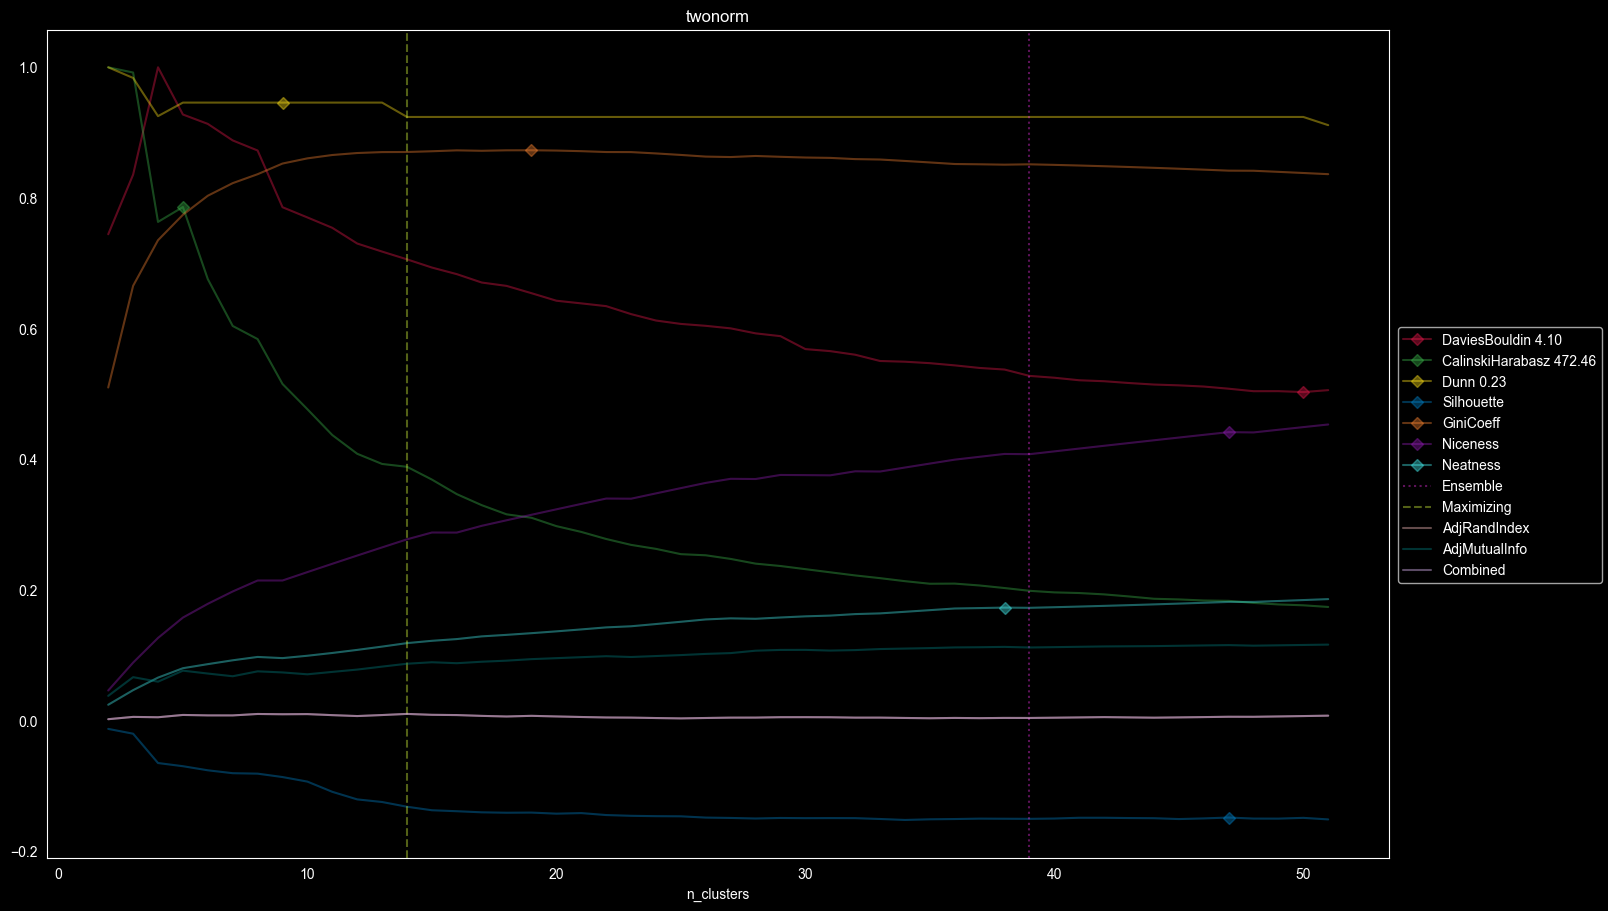

{'Silhouette': -0.13218686819133096, 'Niceness': 0.27723831532939, 'GiniCoeff': 0.8703202955402369, 'Neatness': 0.11832810963786794, 'sample': {'n_clusters': 14}, 'counts_dict': {7: 5, 8: 1, 9: 1, 10: 1, 11: 1, 13: 1, 16: 1, 19: 1, 22: 1, 857: 1}, 'DaviesBouldin': 2.8918946300052135, 'CalinskiHarabasz': 183.45608199514837, 'Dunn': 0.2168161713837089, 'AdjRandIndex': 0.00995338620488617, 'AdjMutualInfo': 0.08677218762455019, 'Combined': 0.00995338620488617}
0    500
1    500
Name: count, dtype: int64
Dataset Summary
n   1000.000000
d     20.000000
k      2.000000
e      0.693147
g      0.000000
Name: twonorm, dtype: float64


  0%|          | 0/50 [00:00<?, ?it/s]

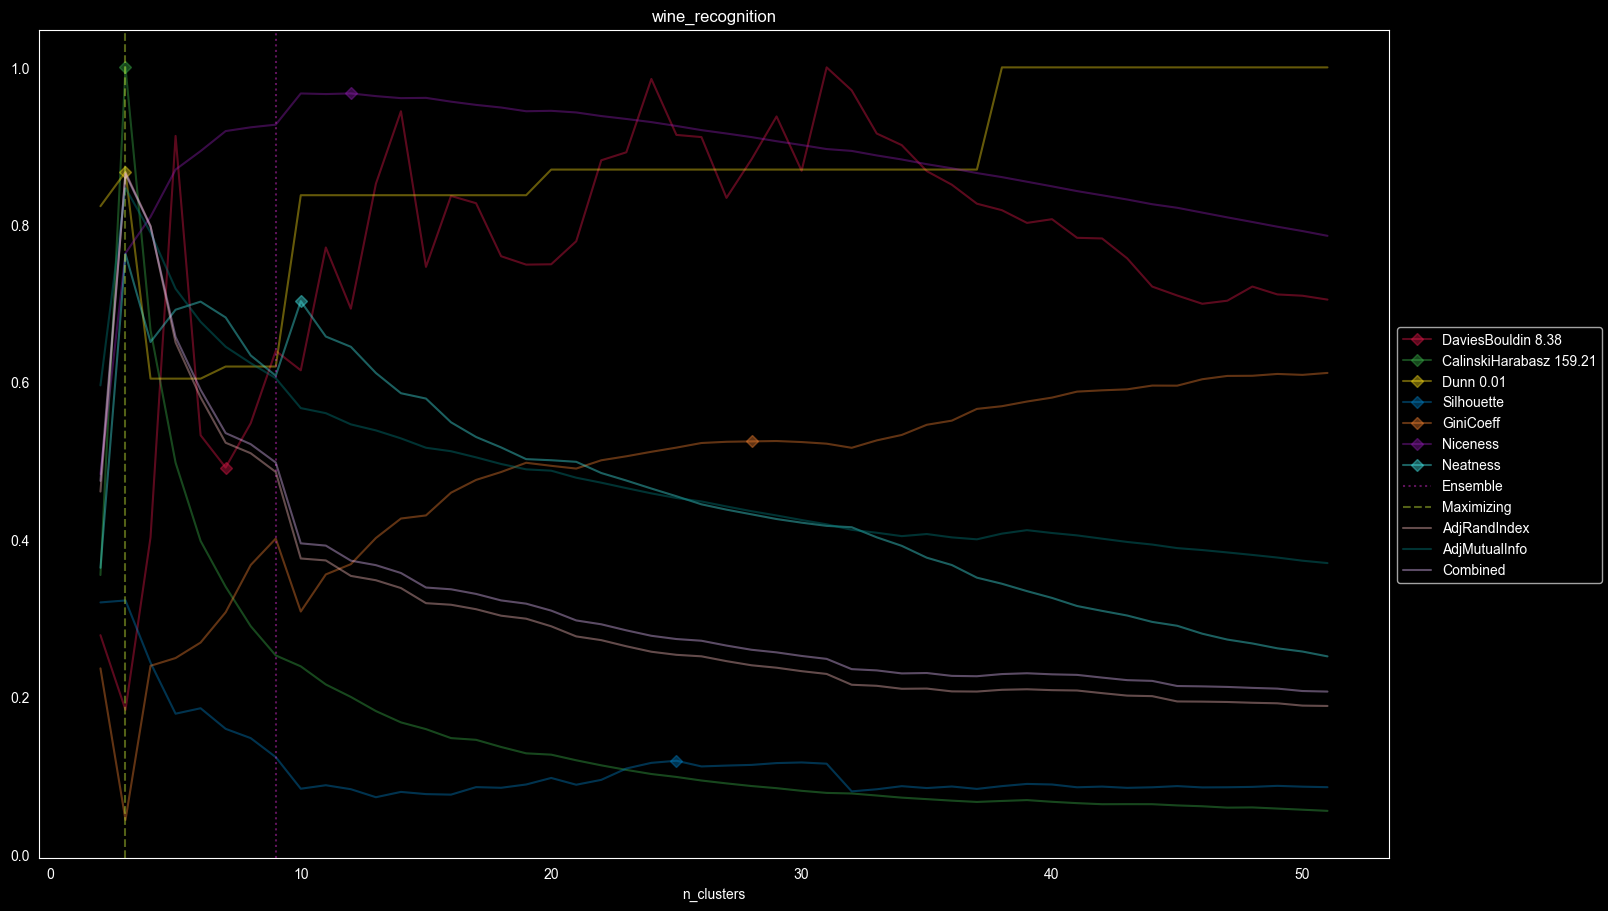

{'Silhouette': 0.32266342592116976, 'Niceness': 0.7638655740830546, 'GiniCoeff': 0.04377104377104377, 'Neatness': 0.7629705455875533, 'sample': {'n_clusters': 3}, 'counts_dict': {53: 1, 62: 1, 63: 1}, 'DaviesBouldin': 1.5393519266722695, 'CalinskiHarabasz': 159.2141680688374, 'Dunn': 0.006991078549015807, 'AdjRandIndex': 0.8665957604928709, 'AdjMutualInfo': 0.8468259136178008, 'Combined': 0.8646054627771652}
2    71
1    59
3    48
Name: count, dtype: int64
Dataset Summary
n   178.000000
d    13.000000
k     3.000000
e     1.086038
g     0.100673
Name: wine_recognition, dtype: float64


In [2]:
# https://github.com/EpistasisLab/pmlb/issues/167
# deprecated = [
#     "cmc",
#     "195_auto_price",
#     "207_autoPrice",
#     "glass",
#     "heart_c",
#     "cleve",
#     "cleveland_nominal",
#     "heart_statlog",
#     "heart_h",
#     "colic",
#     "vote",
#     "wdbc",
#     "australian",
#     "buggyCrx",
#     "crx",
#     "breast_w",
#     "pima",
#     "german",
#     "flare",
#     "car_evaluation",
#     "kr_vs_kp",
#     "294_satellite_image",
#     "197_cpu_act",
#     "227_cpu_small",
#     "562_cpu_small",
#     "1595_poker",
# ]

classification_dataset_names = [
    "agaricus_lepiota",
    "analcatdata_authorship",
    "breast",
    "breast_cancer_wisconsin",
    "collins",
    "confidence",
    "dermatology",
    "ecoli",
    "house_votes_84",
    "iris",
    "kddcup",
    "mfeat_factors",
    "mfeat_fourier",
    "mfeat_karhunen",
    "mfeat_morphological",
    "mfeat_pixel",
    "new_thyroid",
    "optdigits",
    "pendigits",
    "penguins",
    "ring",
    "satimage",
    "segmentation",
    "soybean",
    "texture",
    "tokyo1",
    'twonorm',
    "wine_recognition",
]

max_size = 1000

max_muti = 0
max_rand = 0
max_combo = 0
results = 0
ranks = 0
d = {}
r = {}

for classification_dataset in classification_dataset_names:
    X, y = fetch_data(
        classification_dataset, return_X_y=True, local_cache_dir="/Users/temp/pmlb_data"
    )
    if len(X) > max_size:
        _, X, _, y = train_test_split(X, y, test_size=max_size, random_state=42, stratify=y)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    if X.shape[1] > 2:
        vis = pd.DataFrame(
            umap.UMAP(random_state=42).fit_transform(X), columns=list("ab"), index=X.index
        )
    elif X.shape[1] == 2:
        vis = X.copy()
        vis.columns = list("ab")
    else:
        vis = X.copy()
        vis.columns = ["a"]
        vis["b"] = 0.0
    kwargs = dict(
        df=X,
        title=f"{classification_dataset}",
        actual=y,
    )
    if "precomputed" in inspect.getfullargspec(optimize).args:
        kwargs["precomputed"] = True
        kwargs["chunksize"] = 20
    clusters, (score, res) = optimize(**kwargs)
    # print(res)
    # plt.title(f"{classification_dataset} - Actual")
    # scatterplot(vis, x="a", y="b", hue=y, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    # plt.title(f"{classification_dataset} - Best Possible Prediction")
    # scatterplot(vis, x="a", y="b", hue=clusters, alpha=0.5, palette="bright", legend=False)
    # plt.show()
    rank = res.rank(ascending=False)
    max_muti += res.max_muti
    max_rand += res.max_rand
    max_combo += res.max_combo
    results += res
    ranks += rank
    res = res.Combined
    res["n"], res["d"] = X.shape
    res["k"] = len(np.unique(y))
    _, counts = np.unique(y, return_counts=True)
    res["e"] = entropy(counts)
    res["g"] = gini_coefficient(counts)
    res.name = classification_dataset
    d[classification_dataset] = res
    res.index.name = "Dataset Summary"
    print(res[["n", "d", "k", "e", "g"]])
    res.index.name = "Metric"
    rank = rank.Combined
    rank["n"], rank["d"], rank["k"], rank["e"], rank["g"] = res[["n", "d", "k", "e", "g"]]
    r[classification_dataset] = rank

denom = len(classification_dataset_names)

max_muti /= denom
max_rand /= denom
max_combo /= denom
results /= denom
ranks /= denom
df = pd.DataFrame(d).T
df_rank = pd.DataFrame(r).T

# Results

In [3]:
print("Average Mutual Information:", max_muti)
print("Average Rand Index:", max_rand)
print("Average Combined:", max_combo)

Average Mutual Information: 0.6534821586016432
Average Rand Index: 0.5968883197340844
Average Combined: 0.6032350747127543


### Results across all datasets
- Averages per metric broken down by Mutual Information, Rand Index, and Combined
- Summary statistics
- Correlation matrix
- Mann-Whitney U test

### Raw Scores

In [4]:
results

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                    0.000000      0.000000  0.000000
DaviesBouldin          0.533302      0.374342  0.393525
CalinskiHarabasz       0.477406      0.329510  0.348833
Dunn                   0.529833      0.390845  0.407524
Silhouette             0.535058      0.387909  0.410817
GiniCoeff              0.513363      0.353118  0.375173
Niceness               0.505300      0.320236  0.347573
Neatness               0.571822      0.443871  0.466022
Elbow                  0.000000      0.000000  0.000000
Ensemble               0.544872      0.396988  0.420286

In [5]:
df.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean    0.000000       0.393525          0.348833  0.407524    0.410817   
std     0.000000       0.246492          0.230464  0.221172    0.242096   
min     0.000000       0.001306          0.004469  0.000584    0.001689   
25%     0.000000       0.225565          0.178920  0.265876    0.227078   
50%     0.000000       0.373354          0.372700  0.395215    0.428798   
75%     0.000000       0.529841          0.475907  0.509135    0.573625   
max     0.000000       0.945468          0.916224  0.864605    0.916224   

Metric  GiniCoeff  Niceness  Neatness     Elbow  Ensemble           n  \
count   28.000000 28.000000 28.000000 28.000000 28.000000   28.000000   
mean     0.375173  0.347573  0.466022  0.000000  0.420286  725.142857   
std      0.192627  0.178497  0.236035  0.000000  0.232578  336.290518   
min      0.004856  0.003089  0.001969  0.000000  0.001969   72.000000   
25%      0.256830  0.251408  0.330211  0.000000  0.207944  417.750000   
50%      0.377473  0.376616  0.487066  0.000000  0.422990  979.500000   
75%      0.490605  0.470384  0.652732  0.000000  0.556524 1000.000000   
max      0.770950  0.638514  0.894508  0.000000  0.894508 1000.000000   

Metric          d         k         e         g  
count   28.000000 28.000000 28.000000 28.000000  
mean    42.178571  6.535714  1.543618  0.144173  
std     56.517486  4.307462  0.715935  0.195110  
min      3.000000  2.000000  0.644154  0.000000  
25%     12.250000  2.750000  0.789399  0.000000  
50%     22.500000  6.000000  1.545430  0.061001  
75%     41.750000 10.000000  2.302585  0.226015  
max    240.000000 18.000000  2.625593  0.831584

In [6]:
df.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000          0.500668  0.717649    0.842540   
CalinskiHarabasz  NaN       0.500668          1.000000  0.737968    0.391194   
Dunn              NaN       0.717649          0.737968  1.000000    0.504658   
Silhouette        NaN       0.842540          0.391194  0.504658    1.000000   
GiniCoeff         NaN       0.820199          0.356790  0.567023    0.685141   
Niceness          NaN       0.793642          0.375820  0.627323    0.847351   
Neatness          NaN       0.766878          0.386816  0.552459    0.848019   
Elbow             NaN            NaN               NaN       NaN         NaN   
Ensemble          NaN       0.907373          0.465029  0.748930    0.856173   
n                 NaN       0.208728         -0.195498 -0.032246    0.260560   
d                 NaN       0.372309         -0.199032  0.144413    0.295719   
k                 NaN       0.462682          0.095923  0.273531    0.532148   
e                 NaN       0.414106          0.112805  0.251831    0.608140   
g                 NaN       0.353416          0.298210  0.308893    0.081104   

Metric            GiniCoeff  Niceness  Neatness  Elbow  Ensemble         n  \
Metric                                                                       
BIC                     NaN       NaN       NaN    NaN       NaN       NaN   
DaviesBouldin      0.820199  0.793642  0.766878    NaN  0.907373  0.208728   
CalinskiHarabasz   0.356790  0.375820  0.386816    NaN  0.465029 -0.195498   
Dunn               0.567023  0.627323  0.552459    NaN  0.748930 -0.032246   
Silhouette         0.685141  0.847351  0.848019    NaN  0.856173  0.260560   
GiniCoeff          1.000000  0.746179  0.763649    NaN  0.813174  0.138744   
Niceness           0.746179  1.000000  0.892978    NaN  0.883058  0.033608   
Neatness           0.763649  0.892978  1.000000    NaN  0.857522  0.045395   
Elbow                   NaN       NaN       NaN    NaN       NaN       NaN   
Ensemble           0.813174  0.883058  0.857522    NaN  1.000000  0.232619   
n                  0.138744  0.033608  0.045395    NaN  0.232619  1.000000   
d                  0.406558  0.407411  0.343044    NaN  0.509670  0.412614   
k                  0.486279  0.656125  0.516075    NaN  0.558308  0.315329   
e                  0.434217  0.726912  0.633675    NaN  0.622344  0.282349   
g                  0.255252  0.104279  0.001440    NaN  0.123776 -0.214121   

Metric                   d        k         e         g  
Metric                                                   
BIC                    NaN      NaN       NaN       NaN  
DaviesBouldin     0.372309 0.462682  0.414106  0.353416  
CalinskiHarabasz -0.199032 0.095923  0.112805  0.298210  
Dunn              0.144413 0.273531  0.251831  0.308893  
Silhouette        0.295719 0.532148  0.608140  0.081104  
GiniCoeff         0.406558 0.486279  0.434217  0.255252  
Niceness          0.407411 0.656125  0.726912  0.104279  
Neatness          0.343044 0.516075  0.633675  0.001440  
Elbow                  NaN      NaN       NaN       NaN  
Ensemble          0.509670 0.558308  0.622344  0.123776  
n                 0.412614 0.315329  0.282349 -0.214121  
d                 1.000000 0.337486  0.395964 -0.184243  
k                 0.337486 1.000000  0.893731  0.154868  
e                 0.395964 0.893731  1.000000 -0.187048  
g                -0.184243 0.154868 -0.187048  1.000000

In [7]:
columns = df.columns[:-5]
pd.DataFrame([[mannwhitneyu(df[x], df[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)

Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.560733 0.743106   
CalinskiHarabasz 0.000000       0.560733          1.000000 0.279420   
Dunn             0.000000       0.743106          0.279420 1.000000   
Silhouette       0.000000       0.664084          0.247963 0.831302   
GiniCoeff        0.000000       1.000000          0.628803 0.628803   
Niceness         0.000000       0.774289          0.869833 0.446067   
Neatness         0.000000       0.184391          0.049246 0.313555   
Elbow            1.000000       0.000000          0.000000 0.000000   
Ensemble         0.000000       0.533447          0.212946 0.768011   

Metric            Silhouette  GiniCoeff  Niceness  Neatness    Elbow  Ensemble  
Metric                                                                          
BIC                 0.000000   0.000000  0.000000  0.000000 1.000000  0.000000  
DaviesBouldin       0.664084   1.000000  0.774289  0.184391 0.000000  0.533447  
CalinskiHarabasz    0.247963   0.628803  0.869833  0.049246 0.000000  0.212946  
Dunn                0.831302   0.628803  0.446067  0.313555 0.000000  0.768011  
Silhouette          1.000000   0.600009  0.325496  0.333624 0.000000  0.947734  
GiniCoeff           0.600009   1.000000  0.761771  0.093025 0.000000  0.441169  
Niceness            0.325496   0.761771  1.000000  0.036679 0.000000  0.225265  
Neatness            0.333624   0.093025  0.036679  1.000000 0.000000  0.394077  
Elbow               0.000000   0.000000  0.000000  0.000000 1.000000  0.000000  
Ensemble            0.947734   0.441169  0.225265  0.394077 0.000000  1.000000

### Ranks

In [8]:
ranks

AdjMutualInfo  AdjRandIndex  Combined
Metric                                                 
BIC                    9.500000      9.500000  9.500000
DaviesBouldin          4.875000      4.910714  4.982143
CalinskiHarabasz       5.214286      4.821429  4.785714
Dunn                   4.678571      4.357143  4.428571
Silhouette             3.803571      4.089286  4.089286
GiniCoeff              5.142857      5.035714  4.964286
Niceness               5.803571      5.767857  5.767857
Neatness               2.892857      3.142857  3.142857
Elbow                  9.500000      9.500000  9.500000
Ensemble               3.589286      3.875000  3.839286

In [9]:
df_rank.describe()

Metric       BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
count  28.000000      28.000000         28.000000 28.000000   28.000000   
mean    9.500000       4.982143          4.785714  4.428571    4.089286   
std     0.000000       1.960169          2.682000  2.367661    2.384571   
min     9.500000       1.000000          1.000000  1.000000    1.000000   
25%     9.500000       3.500000          2.000000  2.750000    2.000000   
50%     9.500000       5.000000          5.500000  4.250000    3.000000   
75%     9.500000       6.250000          7.125000  6.625000    6.250000   
max     9.500000       8.000000          8.000000  8.000000    8.000000   

Metric  GiniCoeff  Niceness  Neatness     Elbow  Ensemble           n  \
count   28.000000 28.000000 28.000000 28.000000 28.000000   28.000000   
mean     4.964286  5.767857  3.142857  9.500000  3.839286  725.142857   
std      2.599603  1.624364  2.013184  0.000000  1.333705  336.290518   
min      1.000000  2.000000  1.000000  9.500000  1.000000   72.000000   
25%      2.750000  5.375000  1.000000  9.500000  3.000000  417.750000   
50%      5.000000  6.000000  3.000000  9.500000  4.000000  979.500000   
75%      8.000000  7.000000  4.500000  9.500000  4.500000 1000.000000   
max      8.000000  8.000000  7.000000  9.500000  8.000000 1000.000000   

Metric          d         k         e         g  
count   28.000000 28.000000 28.000000 28.000000  
mean    42.178571  6.535714  1.543618  0.144173  
std     56.517486  4.307462  0.715935  0.195110  
min      3.000000  2.000000  0.644154  0.000000  
25%     12.250000  2.750000  0.789399  0.000000  
50%     22.500000  6.000000  1.545430  0.061001  
75%     41.750000 10.000000  2.302585  0.226015  
max    240.000000 18.000000  2.625593  0.831584

In [10]:
df_rank.corr()

Metric            BIC  DaviesBouldin  CalinskiHarabasz      Dunn  Silhouette  \
Metric                                                                         
BIC               NaN            NaN               NaN       NaN         NaN   
DaviesBouldin     NaN       1.000000         -0.249093  0.029641    0.119210   
CalinskiHarabasz  NaN      -0.249093          1.000000  0.376616   -0.303830   
Dunn              NaN       0.029641          0.376616  1.000000   -0.418671   
Silhouette        NaN       0.119210         -0.303830 -0.418671    1.000000   
GiniCoeff         NaN      -0.160033         -0.137926 -0.197500   -0.408736   
Niceness          NaN      -0.373578         -0.307268 -0.363194   -0.202421   
Neatness          NaN      -0.292628         -0.527448 -0.615512    0.234484   
Elbow             NaN            NaN               NaN       NaN         NaN   
Ensemble          NaN      -0.025931         -0.330965 -0.071211    0.080376   
n                 NaN      -0.262862          0.129510  0.086766   -0.306023   
d                 NaN      -0.268093          0.390473  0.019473   -0.088614   
k                 NaN      -0.064623          0.505623  0.390654   -0.379835   
e                 NaN       0.060692          0.413790  0.429612   -0.423654   
g                 NaN      -0.344204          0.077706 -0.075337    0.072501   

Metric            GiniCoeff  Niceness  Neatness  Elbow  Ensemble         n  \
Metric                                                                       
BIC                     NaN       NaN       NaN    NaN       NaN       NaN   
DaviesBouldin     -0.160033 -0.373578 -0.292628    NaN -0.025931 -0.262862   
CalinskiHarabasz  -0.137926 -0.307268 -0.527448    NaN -0.330965  0.129510   
Dunn              -0.197500 -0.363194 -0.615512    NaN -0.071211  0.086766   
Silhouette        -0.408736 -0.202421  0.234484    NaN  0.080376 -0.306023   
GiniCoeff          1.000000  0.120757 -0.101605    NaN -0.348895  0.046545   
Niceness           0.120757  1.000000  0.489032    NaN -0.017859  0.334968   
Neatness          -0.101605  0.489032  1.000000    NaN  0.257161  0.189417   
Elbow                   NaN       NaN       NaN    NaN       NaN       NaN   
Ensemble          -0.348895 -0.017859  0.257161    NaN  1.000000 -0.265599   
n                  0.046545  0.334968  0.189417    NaN -0.265599  1.000000   
d                  0.124701  0.016404 -0.002348    NaN -0.526827  0.412614   
k                  0.162189 -0.095375 -0.389273    NaN -0.548567  0.315329   
e                  0.352695 -0.152883 -0.524066    NaN -0.636709  0.282349   
g                 -0.065668  0.127815  0.118766    NaN  0.146791 -0.214121   

Metric                   d         k         e         g  
Metric                                                    
BIC                    NaN       NaN       NaN       NaN  
DaviesBouldin    -0.268093 -0.064623  0.060692 -0.344204  
CalinskiHarabasz  0.390473  0.505623  0.413790  0.077706  
Dunn              0.019473  0.390654  0.429612 -0.075337  
Silhouette       -0.088614 -0.379835 -0.423654  0.072501  
GiniCoeff         0.124701  0.162189  0.352695 -0.065668  
Niceness          0.016404 -0.095375 -0.152883  0.127815  
Neatness         -0.002348 -0.389273 -0.524066  0.118766  
Elbow                  NaN       NaN       NaN       NaN  
Ensemble         -0.526827 -0.548567 -0.636709  0.146791  
n                 0.412614  0.315329  0.282349 -0.214121  
d                 1.000000  0.337486  0.395964 -0.184243  
k                 0.337486  1.000000  0.893731  0.154868  
e                 0.395964  0.893731  1.000000 -0.187048  
g                -0.184243  0.154868 -0.187048  1.000000

In [11]:
pd.DataFrame([[mannwhitneyu(df_rank[x], df_rank[y]).pvalue for x in columns]
              for y in columns], index=columns, columns=columns)


Metric                BIC  DaviesBouldin  CalinskiHarabasz     Dunn  \
Metric                                                                
BIC              1.000000       0.000000          0.000000 0.000000   
DaviesBouldin    0.000000       1.000000          0.869054 0.364881   
CalinskiHarabasz 0.000000       0.869054          1.000000 0.586712   
Dunn             0.000000       0.364881          0.586712 1.000000   
Silhouette       0.000000       0.117156          0.408664 0.592068   
GiniCoeff        0.000000       0.953890          0.715337 0.381606   
Niceness         0.000000       0.118107          0.336980 0.039532   
Neatness         0.000000       0.001586          0.012734 0.034539   
Elbow            1.000000       0.000000          0.000000 0.000000   
Ensemble         0.000000       0.016870          0.311454 0.419607   

Metric            Silhouette  GiniCoeff  Niceness  Neatness    Elbow  Ensemble  
Metric                                                                          
BIC                 0.000000   0.000000  0.000000  0.000000 1.000000  0.000000  
DaviesBouldin       0.117156   0.953890  0.118107  0.001586 0.000000  0.016870  
CalinskiHarabasz    0.408664   0.715337  0.336980  0.012734 0.000000  0.311454  
Dunn                0.592068   0.381606  0.039532  0.034539 0.000000  0.419607  
Silhouette          1.000000   0.199609  0.009071  0.118112 0.000000  0.773120  
GiniCoeff           0.199609   1.000000  0.371007  0.006844 0.000000  0.109365  
Niceness            0.009071   0.371007  1.000000  0.000012 0.000000  0.000045  
Neatness            0.118112   0.006844  0.000012  1.000000 0.000000  0.144925  
Elbow               0.000000   0.000000  0.000000  0.000000 1.000000  0.000000  
Ensemble            0.773120   0.109365  0.000045  0.144925 0.000000  1.000000